In [1]:
# 查看 westat 版本号 和 安装路径
import westat
print('version:',westat.version)
print('path:',westat.__path__)

version: 0.1.4
path: ['C:\\pyminer\\lib\\site-packages\\westat']


## 一、数据准备

In [2]:
from westat import *

data=read_csv('./UCI_Credit_Card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,target
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
# 将目标变量重命名为 'y'
data.rename(columns={'target':'y'},inplace=True)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## 二、数据探索

In [4]:
# 查看数据信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         30000 non-null  int64  
 1   LIMIT_BAL  30000 non-null  float64
 2   SEX        30000 non-null  int64  
 3   EDUCATION  30000 non-null  int64  
 4   MARRIAGE   30000 non-null  int64  
 5   AGE        30000 non-null  int64  
 6   PAY_0      30000 non-null  int64  
 7   PAY_2      30000 non-null  int64  
 8   PAY_3      30000 non-null  int64  
 9   PAY_4      30000 non-null  int64  
 10  PAY_5      30000 non-null  int64  
 11  PAY_6      30000 non-null  int64  
 12  BILL_AMT1  30000 non-null  float64
 13  BILL_AMT2  30000 non-null  float64
 14  BILL_AMT3  30000 non-null  float64
 15  BILL_AMT4  30000 non-null  float64
 16  BILL_AMT5  30000 non-null  float64
 17  BILL_AMT6  30000 non-null  float64
 18  PAY_AMT1   30000 non-null  float64
 19  PAY_AMT2   30000 non-null  float64
 20  PAY_AM

In [5]:
# 查看数据
proc_means(data,['LIMIT_BAL','AGE'])

,Variable,N,Mean,Std Dev,Minimum,Maximum
0,LIMIT_BAL,30000,167484.32,129747.66,10000.0,1000000.0
1,AGE,30000,35.49,9.22,21.0,79.0


In [6]:
# 查看数据详情
get_data_desc(data).head(20)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Min,#Mean,#Q1,#Median,#Q3,#Max,#Std,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,1.0,15000.50,7500.75,15000.5,22500.25,30000.0,8660.40,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,10000.0,167484.32,50000.00,140000.0,240000.00,1000000.0,129747.66,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,1.0,1.60,1.00,2.0,2.00,2.0,0.49,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,0.0,1.85,1.00,2.0,2.00,6.0,0.79,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,0.0,1.55,1.00,2.0,2.00,3.0,0.52,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,21.0,35.49,28.00,34.0,41.00,79.0,9.22,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.02,-1.00,0.0,0.00,8.0,1.12,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.13,-1.00,0.0,0.00,8.0,1.20,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.17,-1.00,0.0,0.00,8.0,1.20,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.22,-1.00,0.0,0.00,8.0,1.17,0.0,-1.0,-2.0


In [7]:
# 查看指定的统计量结果
get_data_desc(data,key=['#Mean'])

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique,#Mean
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,100.00%,15000.50
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,0.27%,167484.32
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,0.01%,1.60
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,0.02%,1.85
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,0.01%,1.55
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%,35.49
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.02
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.13
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.17
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%,-0.22


In [8]:
# 查看数据详情,标题显示为中文
get_data_desc(data,language='cn')

,名称,描述,类型,角色,#数量,#N,%N,#缺失值,%缺失值,#唯一值,...,#最小值,#均值,下四分位数,#中位数,#Q3,#最大值,#标准差,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,1.0,15000.50,7500.75,15000.5,22500.25,30000.0,8660.40,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,10000.0,167484.32,50000.00,140000.0,240000.00,1000000.0,129747.66,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,1.0,1.60,1.00,2.0,2.00,2.0,0.49,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,0.0,1.85,1.00,2.0,2.00,6.0,0.79,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,0.0,1.55,1.00,2.0,2.00,3.0,0.52,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,21.0,35.49,28.00,34.0,41.00,79.0,9.22,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.02,-1.00,0.0,0.00,8.0,1.12,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.13,-1.00,0.0,0.00,8.0,1.20,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.17,-1.00,0.0,0.00,8.0,1.20,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.22,-1.00,0.0,0.00,8.0,1.17,0.0,-1.0,-2.0


In [9]:
# 查看数据详情，指定缺失值和数据精度
get_data_desc(data,missing=[],precision=0)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Min,#Mean,#Q1,#Median,#Q3,#Max,#Std,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100%,0,0%,30000,...,1.0,15000.0,7501.0,15000.0,22500.0,30000.0,8660.0,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100%,0,0%,81,...,10000.0,167484.0,50000.0,140000.0,240000.0,1000000.0,129748.0,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100%,0,0%,2,...,1.0,2.0,1.0,2.0,2.0,2.0,0.0,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100%,0,0%,7,...,0.0,2.0,1.0,2.0,2.0,6.0,1.0,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100%,0,0%,4,...,0.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100%,0,0%,56,...,21.0,35.0,28.0,34.0,41.0,79.0,9.0,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100%,0,0%,11,...,-2.0,-0.0,-1.0,0.0,0.0,8.0,1.0,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100%,0,0%,11,...,-2.0,-0.0,-1.0,0.0,0.0,8.0,1.0,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100%,0,0%,11,...,-2.0,-0.0,-1.0,0.0,0.0,8.0,1.0,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100%,0,0%,11,...,-2.0,-0.0,-1.0,0.0,0.0,8.0,1.0,0.0,-1.0,-2.0


In [10]:
# 查看数据详情，显示更多描述统计量
get_data_desc(data,key=['#Sum','#Min','#Q1','#Median','#Q3','#Max','#Mode','#Var','#Std','#Mean','#Kurt','#Skew','#StdMean','#Range','#Cv','#Sum_of_squares','Top1','Top2','Top3'],missing=[],language='en')

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Mean,#Kurt,#Skew,#StdMean,#Range,#Cv,#Sum_of_squares,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,15000.50,-1.20,0.00,50.00,29999.0,57.73%,9.000450e+12,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,167484.32,0.54,0.99,749.10,990000.0,77.47%,1.346547e+15,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,1.60,-1.82,-0.42,0.00,1.0,30.50%,8.433600e+04,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,1.85,2.08,0.97,0.00,6.0,42.65%,1.217620e+05,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,1.55,-1.36,-0.02,0.00,3.0,33.63%,8.042200e+04,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,35.49,0.04,0.73,0.05,58.0,25.98%,4.032563e+07,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.02,2.72,0.73,0.01,10.0,-6729.35%,3.789500e+04,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.13,1.57,0.79,0.01,10.0,-894.98%,4.353300e+04,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.17,2.08,0.84,0.01,10.0,-720.14%,4.380200e+04,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.22,3.50,1.00,0.01,10.0,-529.82%,4.246600e+04,0.0,-1.0,-2.0


In [11]:
# 查看数据详情，显示更多描述统计量，并显示标题为中文
get_data_desc(data,key=['#Sum','#Min','#Q1','#Median','#Q3','#Max','#Mode','#Var','#Std','#Mean','#Kurt','#Skew','#StdMean','#Range','#Cv','#Sum_of_squares','Top1','Top2','Top3'],missing=[],language='cn')

,名称,描述,类型,角色,#数量,#N,%N,#缺失值,%缺失值,#唯一值,...,#均值,#峰度,#偏度,#标准误差,#极差,#变异系数,#平方和,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,15000.50,-1.20,0.00,50.00,29999.0,57.73%,9.000450e+12,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,167484.32,0.54,0.99,749.10,990000.0,77.47%,1.346547e+15,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,1.60,-1.82,-0.42,0.00,1.0,30.50%,8.433600e+04,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,1.85,2.08,0.97,0.00,6.0,42.65%,1.217620e+05,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,1.55,-1.36,-0.02,0.00,3.0,33.63%,8.042200e+04,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,35.49,0.04,0.73,0.05,58.0,25.98%,4.032563e+07,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.02,2.72,0.73,0.01,10.0,-6729.35%,3.789500e+04,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.13,1.57,0.79,0.01,10.0,-894.98%,4.353300e+04,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.17,2.08,0.84,0.01,10.0,-720.14%,4.380200e+04,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-0.22,3.50,1.00,0.01,10.0,-529.82%,4.246600e+04,0.0,-1.0,-2.0


In [12]:
# 查看数据详情
get_data_describe(data).head(20)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Min,#Mean,#Q1,#Median,#Q3,#Max,#Std,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,1.0,15000.50,7500.75,15000.5,22500.25,30000.0,8660.40,1.0,19997.0,20009.0
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,...,10000.0,167484.32,50000.00,140000.0,240000.00,1000000.0,129747.66,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,1.0,1.60,1.00,2.0,2.00,2.0,0.49,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,0.0,1.85,1.00,2.0,2.00,6.0,0.79,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,0.0,1.55,1.00,2.0,2.00,3.0,0.52,2.0,1.0,3.0
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,...,21.0,35.49,28.00,34.0,41.00,79.0,9.22,29.0,27.0,28.0
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.02,-1.00,0.0,0.00,8.0,1.12,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.13,-1.00,0.0,0.00,8.0,1.20,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.17,-1.00,0.0,0.00,8.0,1.20,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.22,-1.00,0.0,0.00,8.0,1.17,0.0,-1.0,-2.0


In [13]:
# 创建一个包含特征英文名 Name ，特征中文名 Label的 DataFrame
## 设置列的数据字典，包含Name 和Label 两列，用于保存特征英文名称，特征中文名称
col_dict = pd.DataFrame(data={'Name':['LIMIT_BAL','AGE','PAY_0'],'Label':['授信余额','年龄','支付金额']})

#在数据描述中展示特征中文名
get_data_describe(data,col_dict).head(20)

C:\pyminer\lib\site-packages\westat\get_data_describe.py:169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  result['Describe'][result.iloc[:, -1].notnull()] = result.iloc[:, -1]


,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,...,#Min,#Mean,#Q1,#Median,#Q3,#Max,#Std,Top1,Top2,Top3
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,...,1.0,15000.50,7500.75,15000.5,22500.25,30000.0,8660.40,1.0,19997.0,20009.0
1,LIMIT_BAL,授信余额,float64,feature,30000,30000,100.00%,0,0.00%,81,...,10000.0,167484.32,50000.00,140000.0,240000.00,1000000.0,129747.66,50000.0,20000.0,30000.0
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,...,1.0,1.60,1.00,2.0,2.00,2.0,0.49,2.0,1.0,NaN
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,...,0.0,1.85,1.00,2.0,2.00,6.0,0.79,2.0,1.0,3.0
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,...,0.0,1.55,1.00,2.0,2.00,3.0,0.52,2.0,1.0,3.0
5,AGE,年龄,int64,feature,30000,30000,100.00%,0,0.00%,56,...,21.0,35.49,28.00,34.0,41.00,79.0,9.22,29.0,27.0,28.0
6,PAY_0,支付金额,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.02,-1.00,0.0,0.00,8.0,1.12,0.0,-1.0,1.0
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.13,-1.00,0.0,0.00,8.0,1.20,0.0,-1.0,2.0
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.17,-1.00,0.0,0.00,8.0,1.20,0.0,-1.0,-2.0
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,...,-2.0,-0.22,-1.00,0.0,0.00,8.0,1.17,0.0,-1.0,-2.0


In [14]:
get_data_describe(data,key=[]).head(20)

,Name,Describe,Type,Role,#Count,#N,%N,#Missing,%Missing,#Unique,%Unique
0,ID,,int64,feature,30000,30000,100.00%,0,0.00%,30000,100.00%
1,LIMIT_BAL,,float64,feature,30000,30000,100.00%,0,0.00%,81,0.27%
2,SEX,,int64,feature,30000,30000,100.00%,0,0.00%,2,0.01%
3,EDUCATION,,int64,feature,30000,30000,100.00%,0,0.00%,7,0.02%
4,MARRIAGE,,int64,feature,30000,30000,100.00%,0,0.00%,4,0.01%
5,AGE,,int64,feature,30000,30000,100.00%,0,0.00%,56,0.19%
6,PAY_0,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%
7,PAY_2,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%
8,PAY_3,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%
9,PAY_4,,int64,feature,30000,30000,100.00%,0,0.00%,11,0.04%


In [15]:
# 检查数据是否有目标变量，有 名为 y 或者 target 的列，则返回True，否则返回 False
check_data_target(data)

True

## 查看数据分布

In [16]:
# 查看目标变量的数据分布
get_data_dist(data)

,Value,#Count,%Ratio
0,1,6636,22.12%
1,0,23364,77.88%
2,Total,30000,100.00%


In [17]:
# 查看指定特征的数据分布，并将标题显示为中文，小数位数显示为4位，并显示更多信息
get_data_dist(data,language='cn',precision=4,col='LIMIT_BAL',display=True)

,序号,名称,值,#数量,%占比
0,1,LIMIT_BAL,1000000.0,1,0.0033%
1,2,LIMIT_BAL,327680.0,1,0.0033%
2,3,LIMIT_BAL,760000.0,1,0.0033%
3,4,LIMIT_BAL,690000.0,1,0.0033%
4,5,LIMIT_BAL,740000.0,2,0.0067%
...,...,...,...,...,...
77,78,LIMIT_BAL,80000.0,1567,5.2233%
78,79,LIMIT_BAL,30000.0,1610,5.3667%
79,80,LIMIT_BAL,20000.0,1976,6.5867%
80,81,LIMIT_BAL,50000.0,3365,11.2167%


In [18]:
# 按照完全的函数名称，显示目标变量的数据分布
get_data_distribution(data)

,Value,#Count,%Ratio
0,1,6636,22.12%
1,0,23364,77.88%
2,Total,30000,100.00%


In [19]:
get_data_distribution(data,col='SEX')

,Value,#Count,%Ratio
0,1,11888,39.63%
1,2,18112,60.37%
2,Total,30000,100.00%


In [20]:
get_data_distribution(data,col='EDUCATION')

,Value,#Count,%Ratio
0,0,14,0.05%
1,6,51,0.17%
2,4,123,0.41%
3,5,280,0.93%
4,3,4917,16.39%
5,1,10585,35.28%
6,2,14030,46.77%
7,Total,30000,100.00%


In [21]:
get_data_dist(data,col='MARRIAGE')

,Value,#Count,%Ratio
0,0,54,0.18%
1,3,323,1.08%
2,1,13659,45.53%
3,2,15964,53.21%
4,Total,30000,100.00%


In [22]:
get_data_dist(data,col='MARRIAGE',display=False)

,Value,#Count,%Ratio
0,0,54,0.18%
1,3,323,1.08%
2,1,13659,45.53%
3,2,15964,53.21%
4,Total,30000,100.00%


In [23]:
get_data_distribution(data,col='MARRIAGE',language='cn',display=False,precision=0)

,值,#数量,%占比
0,0,54,0%
1,3,323,1%
2,1,13659,46%
3,2,15964,53%
4,合计,30000,100%


In [24]:
get_data_distribution(data,col='MARRIAGE',language='cn',precision=2,display=False)

,值,#数量,%占比
0,0,54,0.18%
1,3,323,1.08%
2,1,13659,45.53%
3,2,15964,53.21%
4,合计,30000,100.00%


In [25]:
get_data_distribution(data,col='MARRIAGE',language='cn')

,值,#数量,%占比
0,0,54,0.18%
1,3,323,1.08%
2,1,13659,45.53%
3,2,15964,53.21%
4,合计,30000,100.00%


In [26]:
get_data_distribution(data,col='MARRIAGE',language='en',total=False,display=True)

,No.,Name,Value,#Count,%Ratio
0,1,MARRIAGE,0,54,0.18%
1,2,MARRIAGE,3,323,1.08%
2,3,MARRIAGE,1,13659,45.53%
3,4,MARRIAGE,2,15964,53.21%


In [27]:
get_data_distribution(data,col='MARRIAGE',language='cn',precision=0)

,值,#数量,%占比
0,0,54,0%
1,3,323,1%
2,1,13659,46%
3,2,15964,53%
4,合计,30000,100%


In [28]:
get_data_distribution(data,col='MARRIAGE',language='cn',precision=0,ascending =True)

,值,#数量,%占比
0,0,54,0%
1,3,323,1%
2,1,13659,46%
3,2,15964,53%
4,合计,30000,100%


In [29]:
get_data_distribution(data,col='MARRIAGE',language='en',precision=2,by=['#Count'],ascending =[False])

,Value,#Count,%Ratio
0,2,15964,53.21%
1,1,13659,45.53%
2,3,323,1.08%
3,0,54,0.18%
4,Total,30000,100.00%


## 数据分区

In [30]:
data_train,data_test = get_data_partition(data,0.25)
get_data_dist(data_train)

,Value,#Count,%Ratio
0,1,4936,21.94%
1,0,17564,78.06%
2,Total,22500,100.00%


In [31]:
#去除重复值
data_train.drop_duplicates(inplace=True)
get_data_dist(data_train)

,Value,#Count,%Ratio
0,1,4936,21.94%
1,0,17564,78.06%
2,Total,22500,100.00%


In [32]:
#查看缺失值
data_train.isnull().mean()

ID           0.0
LIMIT_BAL    0.0
SEX          0.0
EDUCATION    0.0
MARRIAGE     0.0
AGE          0.0
PAY_0        0.0
PAY_2        0.0
PAY_3        0.0
PAY_4        0.0
PAY_5        0.0
PAY_6        0.0
BILL_AMT1    0.0
BILL_AMT2    0.0
BILL_AMT3    0.0
BILL_AMT4    0.0
BILL_AMT5    0.0
BILL_AMT6    0.0
PAY_AMT1     0.0
PAY_AMT2     0.0
PAY_AMT3     0.0
PAY_AMT4     0.0
PAY_AMT5     0.0
PAY_AMT6     0.0
y            0.0
dtype: float64

## 特征分箱

### 先粗略分箱，试探变量的badRate趋势

In [33]:
# 等频分箱，计算WoE和IV
get_woe_iv(data,col='AGE',qcut=5)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.12,0.0,0.01
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.15,0.0,0.01
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.10,0.0,0.01
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.02,0.0,0.01
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.12,0.0,0.01


In [34]:
# 等频分箱，计算WoE和IV， 显示标题为中文
get_woe_iv(data,col='AGE',qcut=5,language='cn')

,名称,分组序号,分组逻辑,#合计,#坏,#好,%合计,%坏,%好,%坏件率,WoE,IV,IV合计
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.12,0.0,0.01
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.15,0.0,0.01
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.10,0.0,0.01
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.02,0.0,0.01
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.12,0.0,0.01


In [35]:
#使用默认的决策树方法进行分箱
get_woe_iv(data,col='AGE')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [36]:
#使用默认的决策树方法进行分箱，显示缺失值分组
get_woe_iv(data,col='AGE',show_default =True)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,missing,0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.02
1,AGE,2,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
2,AGE,3,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
3,AGE,4,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
4,AGE,5,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [37]:
# 设置输出的分箱小数点位数
get_woe_iv(data,'AGE',precision=4)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.9033%,15.5515%,12.1512%,26.6598%,0.2467,0.0084,0.0213
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.1267%,38.6528%,44.3974%,19.8253%,-0.1386,0.0080,0.0213
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.4067%,28.0440%,28.5097%,21.8376%,-0.0165,0.0001,0.0213
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.5633%,17.7517%,14.9418%,25.2302%,0.1723,0.0048,0.0213


In [38]:
# 设置输出结果的标题为中文
get_woe_iv(data,'AGE',language='cn')

,名称,分组序号,分组逻辑,#合计,#坏,#好,%合计,%坏,%好,%坏件率,WoE,IV,IV合计
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [39]:
# 按照指定的切分点 分箱，并计算 WoE 和 IV
get_woe_iv(data,'AGE',bins=[-inf,20,30,40,50,inf])

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 20.0]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.0,0.01
1,AGE,2,"(20.0, 30.0]",11013,2471,8542,36.71%,37.24%,36.56%,22.44%,0.02,0.0,0.01
2,AGE,3,"(30.0, 40.0]",10713,2189,8524,35.71%,32.99%,36.48%,20.43%,-0.10,0.0,0.01
3,AGE,4,"(40.0, 50.0]",6005,1399,4606,20.02%,21.08%,19.71%,23.30%,0.07,0.0,0.01
4,AGE,5,"(50.0, inf]",2269,577,1692,7.56%,8.69%,7.24%,25.43%,0.18,0.0,0.01


In [40]:
# 使用决策树方法计算计算 WoE 和 IV
get_woe_iv(data,'PAY_0','tree')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,"(-inf, -1.0]",8445,1319,7126,28.15%,19.88%,30.50%,15.62%,-0.43,0.05,0.87
1,PAY_0,2,"(-1.0, 0.0]",14737,1888,12849,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.87
2,PAY_0,3,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.87
3,PAY_0,4,"(1.0, inf]",3130,2177,953,10.43%,32.81%,4.08%,69.55%,2.08,0.60,0.87


In [41]:
# 指定缺失值类型，并使用默认的决策树分箱方法进行分箱，计算WoE和IV, 
data['PAY_0'][0] = np.nan
data['PAY_0'][1] = -99999

get_woe_iv(data,col='PAY_0',missing = [-99999])

C:\Users\about\AppData\Local\Temp\ipykernel_26572\893849562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PAY_0'][0] = np.nan


,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,missing,2,2,0,0.01%,0.03%,0.00%,100.00%,0.00,0.00,0.87
1,PAY_0,2,"(-inf, -1.0]",8444,1318,7126,28.15%,19.86%,30.50%,15.61%,-0.43,0.05,0.87
2,PAY_0,3,"(-1.0, 0.0]",14737,1888,12849,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.87
3,PAY_0,4,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.87
4,PAY_0,5,"(1.0, inf]",3129,2176,953,10.43%,32.79%,4.08%,69.54%,2.08,0.60,0.87


## 查看WoE 和 IV

In [42]:
# 按照默认的决策树方法，计算WoE 和 IV，并查看WoE的分布
view_woe_iv(data,'AGE')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


In [43]:
# 按照默认的决策树方法，计算WoE 和 IV，并查看WoE的分布 , 设置显示的颜色为绿色
view_woe_iv(data,'AGE',color='green')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


In [44]:
# 按照默认的决策树方法，计算WoE 和 IV，并查看WoE的分布，设置显示的颜色
view_woe_iv(data,'AGE',color='#02B057')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


In [45]:
# 按照等频分箱，将特征分为5箱，计算WoE 和 IV，并查看WoE的分布
view_woe_iv(data,'AGE',qcut=5,precision=2)

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.
0,AGE,1,"(20.999, 27.0]",6604,1598,5006,22.01%,24.08%,21.43%,24.20%,0.120000,0.000000,0.010000,0.120000
1,AGE,2,"(27.0, 31.0]",5626,1102,4524,18.75%,16.61%,19.36%,19.59%,-0.150000,0.000000,0.010000,-0.150000
2,AGE,3,"(31.0, 37.0]",6728,1380,5348,22.43%,20.80%,22.89%,20.51%,-0.100000,0.000000,0.010000,-0.100000
3,AGE,4,"(37.0, 43.0]",5056,1100,3956,16.85%,16.58%,16.93%,21.76%,-0.020000,0.000000,0.010000,-0.020000
4,AGE,5,"(43.0, 79.0]",5986,1456,4530,19.95%,21.94%,19.39%,24.32%,0.120000,0.000000,0.010000,0.120000


In [46]:
# 按照给定的切分点，将特征分箱，计算WoE 和 IV，并查看WoE的分布
view_woe_iv(data,'AGE',language='cn',bins=[-inf,20,25,30,35,inf])

,名称,分组序号,分组逻辑,#合计,#坏,#好,%合计,%坏,%好,%坏件率,WoE,IV,IV合计,WoE.
0,AGE,1,"(-inf, 20.0]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.000000,0.000000,0.020000,0.000000
1,AGE,2,"(20.0, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
2,AGE,3,"(25.0, 30.0]",7142,1439,5703,23.81%,21.68%,24.41%,20.15%,-0.120000,0.000000,0.020000,-0.120000
3,AGE,4,"(30.0, 35.0]",5796,1126,4670,19.32%,16.97%,19.99%,19.43%,-0.160000,0.000000,0.020000,-0.160000
4,AGE,5,"(35.0, inf]",13191,3039,10152,43.97%,45.80%,43.45%,23.04%,0.050000,0.000000,0.020000,0.050000


In [47]:
# 设置输出的分箱标题为中文,并设置WOE和IV的小数位数
view_woe_iv(data,'AGE',language='cn',precision=2)

,名称,分组序号,分组逻辑,#合计,#坏,#好,%合计,%坏,%好,%坏件率,WoE,IV,IV合计,WoE.
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.250000,0.010000,0.020000,0.250000
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.140000,0.010000,0.020000,-0.140000
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.020000,0.000000,0.020000,-0.020000
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.170000,0.000000,0.020000,0.170000


## 计算WOE 并绘图

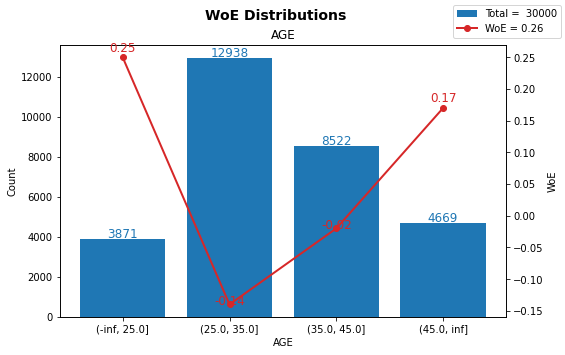

In [48]:
# 根据默认参数，将特征分箱，计算WoE,并展示图形
plot_woe(data,'AGE')

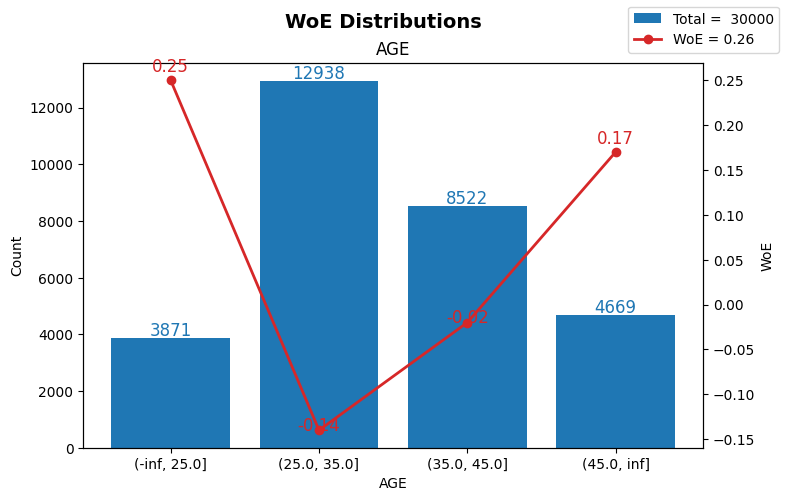

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(-inf, 25.0]",3871,1032,2839,12.90%,15.55%,12.15%,26.66%,0.25,0.01,0.02
1,AGE,2,"(25.0, 35.0]",12938,2565,10373,43.13%,38.65%,44.40%,19.83%,-0.14,0.01,0.02
2,AGE,3,"(35.0, 45.0]",8522,1861,6661,28.41%,28.04%,28.51%,21.84%,-0.02,0.00,0.02
3,AGE,4,"(45.0, inf]",4669,1178,3491,15.56%,17.75%,14.94%,25.23%,0.17,0.00,0.02


In [49]:
# 根据默认参数，将特征分箱，并计算WoE,并展示图形 和 数据
plot_woe(data,'AGE',return_data =True)

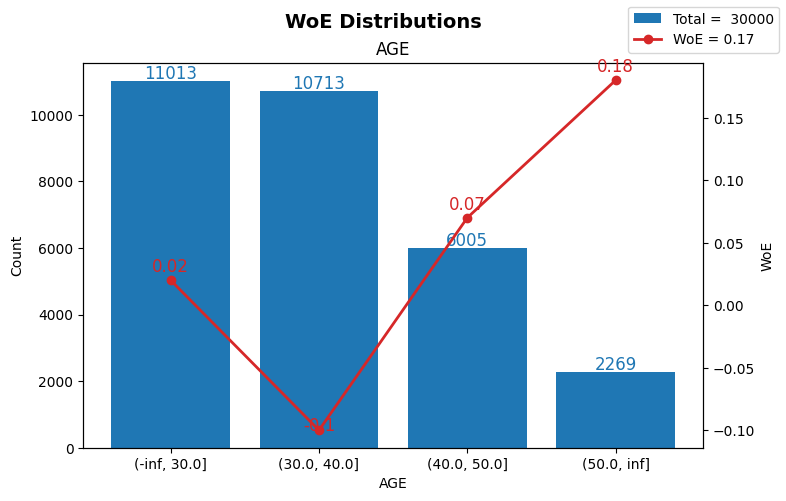

In [50]:
# 根据指定切分点计算WoE,并展示图形
plot_woe(data,'AGE',bins=[-inf,30,40,50,inf])

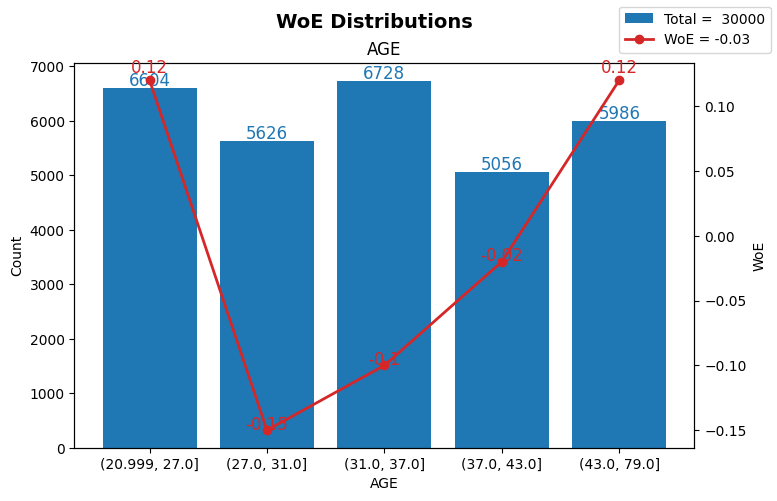

In [51]:
# 根据等频分箱，将特征分为5箱，并计算WoE,并展示图形
plot_woe(data,'AGE',qcut=5)

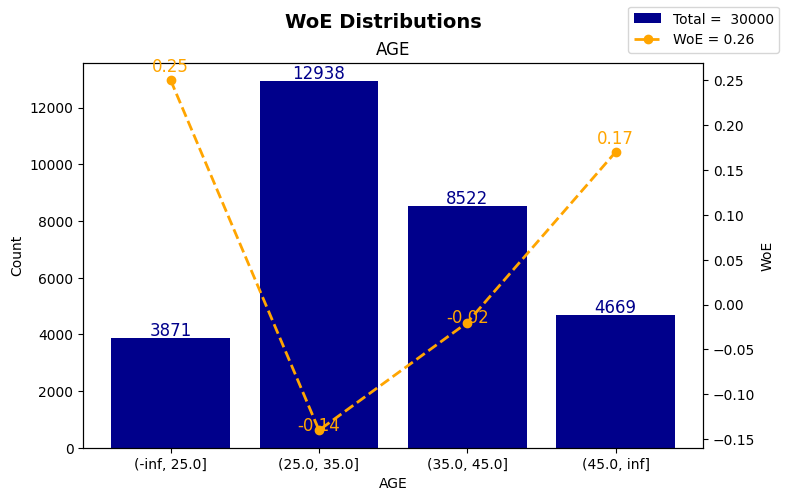

In [52]:
# 根据默认的决策树方法分箱，并计算WoE,设置图形的颜色和样式，并展示图形
plot_woe(data,'AGE',color=['darkblue','orange'],linewidth=2,linestyle='--')

## 计算 IV 并绘图

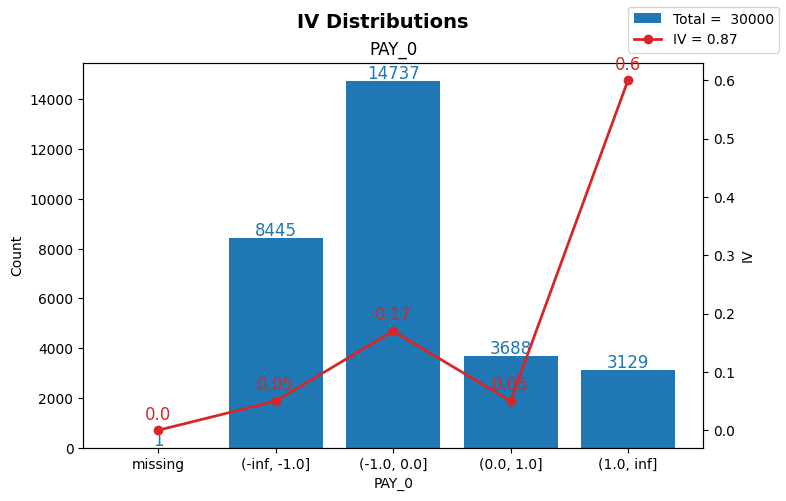

In [53]:
# 根据默认的决策树方法分箱，并计算IV，展示图形
plot_iv(data,'PAY_0')

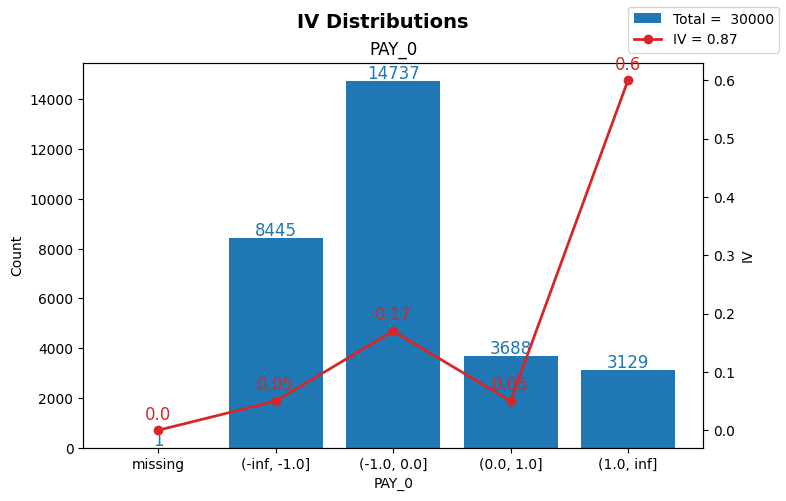

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,PAY_0,1,missing,1,1,0,0.00%,0.02%,0.00%,100.00%,0.00,0.00,0.87
1,PAY_0,2,"(-inf, -1.0]",8445,1319,7126,28.15%,19.88%,30.50%,15.62%,-0.43,0.05,0.87
2,PAY_0,3,"(-1.0, 0.0]",14737,1888,12849,49.12%,28.45%,54.99%,12.81%,-0.66,0.17,0.87
3,PAY_0,4,"(0.0, 1.0]",3688,1252,2436,12.29%,18.87%,10.43%,33.95%,0.59,0.05,0.87
4,PAY_0,5,"(1.0, inf]",3129,2176,953,10.43%,32.79%,4.08%,69.54%,2.08,0.60,0.87


In [54]:
# 根据默认的决策树方法分箱，并计算IV，展示图形 和 数据
plot_iv(data,'PAY_0',return_data=True)

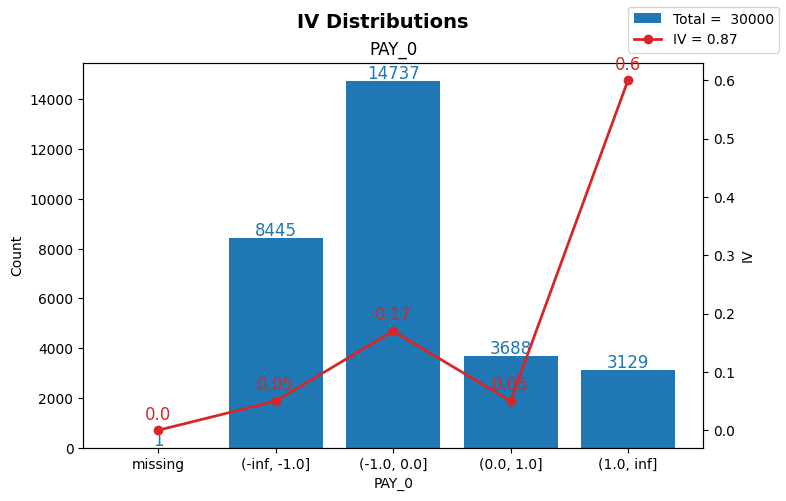

In [55]:
# 根据决策树方法分箱，并计算IV，展示图形
plot_iv(data,'PAY_0',criterion='tree')

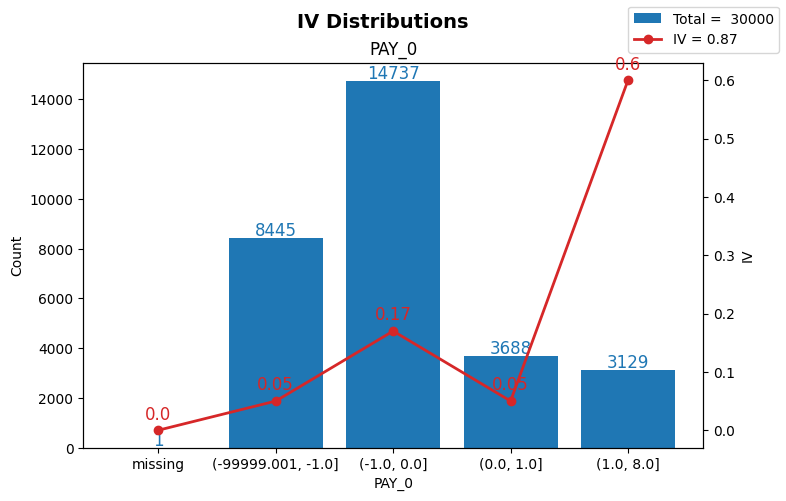

In [56]:
# 根据等频分箱，将特征分为5箱，并计算IV,展示图形
plot_iv(data,'PAY_0',qcut=5)

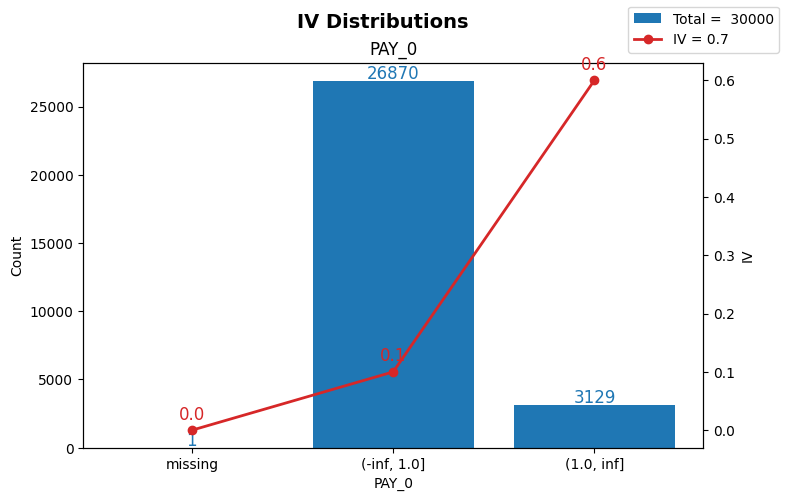

In [57]:
# 根据指定的切分点，将特征分箱，并计算IV,展示图形
plot_iv(data,'PAY_0',bins=[-inf,1,inf])

### 获取列的数据类型，离散型、连续型

In [58]:
col_types = get_col_type(data)
col_types

2023-01-29 09:46:08,767 [INFO] 26572 get_col_type 连续和离散变量划分中。。。
2023-01-29 09:46:08,769 [INFO] 26572 get_col_type 连续和离散变量划分完成！


,Name,Type
0,ID,continuous
1,LIMIT_BAL,continuous
2,SEX,continuous
3,EDUCATION,continuous
4,MARRIAGE,continuous
5,AGE,continuous
6,PAY_0,continuous
7,PAY_2,continuous
8,PAY_3,continuous
9,PAY_4,continuous


## 决策树分箱

In [59]:
# 根据决策树方法，获取特征的分箱切分点结果
get_tree_bins(data, 'AGE', max_leaf_nodes=4,min_samples_leaf=0.05)

[-inf, 25.0, 35.0, 45.0, inf]

## 批量决策树分箱

In [60]:
col_bins = get_col_bin(data,max_leaf_nodes=4)
col_bins

2023-01-29 09:46:08,825 [INFO] 26572 get_col_type 连续和离散变量划分中。。。
2023-01-29 09:46:08,826 [INFO] 26572 get_col_type 连续和离散变量划分完成！
2023-01-29 09:46:08,826 [INFO] 26572 get_col_bin 连续变量决策树分箱进行中。。。


,Name,Bins
0,ID,"[-inf, 15947.0, 18455.0, 26441.0, inf]"
1,LIMIT_BAL,"[-inf, 40000.0, 140000.0, 360000.0, inf]"
2,SEX,"[-inf, 1.0, inf]"
3,EDUCATION,"[-inf, 1.0, 2.0, inf]"
4,MARRIAGE,"[-inf, 1.0, inf]"
5,AGE,"[-inf, 25.0, 35.0, 45.0, inf]"
6,PAY_0,"[-inf, -1.0, 0.0, 1.0, inf]"
7,PAY_2,"[-inf, -2.0, -1.0, 1.0, inf]"
8,PAY_3,"[-inf, -2.0, -1.0, 1.0, inf]"
9,PAY_4,"[-inf, -2.0, -1.0, 0.0, inf]"


## 手动调整分箱

In [61]:
data_bins_adjust = get_modify_bins(col_bins,[
['AGE',[-inf,20,30,40,50,inf]],
['BILL_AMT1',[-inf,1000,8000,50000,inf]],
])
data_bins_adjust

,Name,Bins
0,ID,"[-inf, 15947.0, 18455.0, 26441.0, inf]"
1,LIMIT_BAL,"[-inf, 40000.0, 140000.0, 360000.0, inf]"
2,SEX,"[-inf, 1.0, inf]"
3,EDUCATION,"[-inf, 1.0, 2.0, inf]"
4,MARRIAGE,"[-inf, 1.0, inf]"
5,AGE,"[-inf, 20, 30, 40, 50, inf]"
6,PAY_0,"[-inf, -1.0, 0.0, 1.0, inf]"
7,PAY_2,"[-inf, -2.0, -1.0, 1.0, inf]"
8,PAY_3,"[-inf, -2.0, -1.0, 1.0, inf]"
9,PAY_4,"[-inf, -2.0, -1.0, 0.0, inf]"


## 数据离散化

In [62]:
# 自动化根据决策树分箱，并进行数据离散化
get_data_discrete(data)

2023-01-29 09:46:09,141 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。
2023-01-29 09:46:09,141 [INFO] 26572 get_col_type 连续和离散变量划分中。。。
2023-01-29 09:46:09,142 [INFO] 26572 get_col_type 连续和离散变量划分完成！
2023-01-29 09:46:09,142 [INFO] 26572 get_col_bin 连续变量决策树分箱进行中。。。


  0%|          | 0/24 [00:00<?, ?it/s]

2023-01-29 09:46:09,652 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(-inf, 15947.0]","(-inf, 40000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(-inf, 25.0]",missing,"(1.0, inf]","(-2.0, -1.0]","(-2.0, -1.0]",...,"(-inf, 787.0]","(-inf, 390.0]","(-inf, 420.0]","(-inf, 21.0]","(90.0, 4979.0]","(-inf, 17.0]","(-inf, 0.0]","(-inf, 0.0]","(-inf, 1.0]",1
1,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(25.0, 35.0]","(-inf, -1.0]","(1.0, inf]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(787.0, 16643.0]","(390.0, 12541.0]","(420.0, 12655.0]","(-inf, 21.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(-inf, 0.0]","(1.0, 2000.0]",1
2,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(25.0, 35.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(787.0, 16643.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(0.0, 2000.0]","(2000.0, 9844.0]",0
3,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(35.0, 45.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(0.0, 2000.0]","(1.0, 2000.0]",0
4,"(-inf, 15947.0]","(40000.0, 140000.0]","(-inf, 1.0]","(1.0, 2.0]","(-inf, 1.0]","(45.0, inf]","(-inf, -1.0]","(-1.0, 1.0]","(-2.0, -1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(15000.0, inf]","(4640.0, 16883.0]","(4327.0, inf]","(0.0, 2000.0]","(1.0, 2000.0]",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,"(26441.0, inf]","(140000.0, 360000.0]","(-inf, 1.0]","(2.0, inf]","(-inf, 1.0]","(35.0, 45.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(79181.0, inf]","(12541.0, 51044.0]","(12655.0, 51106.0]","(4550.0, 17580.0]","(15000.0, inf]","(4640.0, 16883.0]","(1900.0, 4327.0]","(2000.0, 9980.0]","(1.0, 2000.0]",0
29996,"(26441.0, inf]","(140000.0, 360000.0]","(-inf, 1.0]","(2.0, inf]","(1.0, inf]","(35.0, 45.0]","(-inf, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]",...,"(787.0, 16643.0]","(390.0, 12541.0]","(-inf, 420.0]","(21.0, 4550.0]","(90.0, 4979.0]","(4640.0, 16883.0]","(0.0, 1900.0]","(-inf, 0.0]","(-inf, 1.0]",0
29997,"(26441.0, inf]","(-inf, 40000.0]","(-inf, 1.0]","(1.0, 2.0]","(1.0, inf]","(35.0, 45.0]","(1.0, inf]","(1.0, inf]","(1.0, inf]","(-2.0, -1.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(-inf, 21.0]","(-inf, 90.0]","(16883.0, inf]","(1900.0, 4327.0]","(0.0, 2000.0]","(2000.0, 9844.0]",1
29998,"(26441.0, inf]","(40000.0, 140000.0]","(-inf, 1.0]","(2.0, inf]","(-inf, 1.0]","(35.0, 45.0]","(0.0, 1.0]","(-2.0, -1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(390.0, 12541.0]","(12655.0, 51106.0]","(17580.0, inf]","(90.0, 4979.0]","(17.0, 4640.0]","(1900.0, 4327.0]","(9980.0, inf]","(1.0, 2000.0]",1


In [63]:
# 按照调整后的分箱结果进行离散化
data_train_discrete = get_data_discrete(data_train,col_bin = data_bins_adjust)
data_train_discrete.head()

2023-01-29 09:46:09,703 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/24 [00:00<?, ?it/s]

2023-01-29 09:46:09,940 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,"(18455.0, 26441.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(20.0, 30.0]","(-inf, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]","(-2.0, -1.0]",...,"(79181.0, inf]","(51044.0, inf]","(51106.0, inf]","(21.0, 4550.0]","(90.0, 4979.0]","(16883.0, inf]","(1900.0, 4327.0]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
1,"(-inf, 15947.0]","(140000.0, 360000.0]","(1.0, inf]","(1.0, 2.0]","(1.0, inf]","(20.0, 30.0]","(-inf, -1.0]","(-inf, -2.0]","(-inf, -2.0]","(-inf, -2.0]",...,"(79181.0, inf]","(390.0, 12541.0]","(420.0, 12655.0]","(21.0, 4550.0]","(90.0, 4979.0]","(16883.0, inf]","(4327.0, inf]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
2,"(-inf, 15947.0]","(40000.0, 140000.0]","(1.0, inf]","(-inf, 1.0]","(1.0, inf]","(20.0, 30.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(0.0, 1900.0]","(2000.0, 9980.0]","(2000.0, 9844.0]",0
3,"(26441.0, inf]","(-inf, 40000.0]","(-inf, 1.0]","(2.0, inf]","(1.0, inf]","(20.0, 30.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(12541.0, 51044.0]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(-inf, 0.0]","(0.0, 2000.0]","(-inf, 1.0]",0
4,"(18455.0, 26441.0]","(40000.0, 140000.0]","(1.0, inf]","(1.0, 2.0]","(-inf, 1.0]","(30.0, 40.0]","(-1.0, 0.0]","(-1.0, 1.0]","(-1.0, 1.0]","(-1.0, 0.0]",...,"(16643.0, 79181.0]","(51044.0, inf]","(12655.0, 51106.0]","(21.0, 4550.0]","(90.0, 4979.0]","(17.0, 4640.0]","(1900.0, 4327.0]","(0.0, 2000.0]","(1.0, 2000.0]",0


## WOE转换

In [64]:
# 使用已经离散化的数据，批量进行WoE转换
data_train_woe = get_data_woe_transform(data_train_discrete)
data_train_woe.head()

2023-01-29 09:46:09,968 [INFO] 26572 get_data_woe_transform WOE转换中。。。


  0%|          | 0/24 [00:00<?, ?it/s]

2023-01-29 09:46:10,613 [INFO] 26572 get_data_woe_transform WOE转换完成！


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,y
0,-0.17,0.15,-0.07,0.09,0.07,0.01,-0.42,-0.38,-0.43,-0.38,...,-0.12,-0.13,-0.11,-0.02,0.0,-0.88,-0.16,-0.22,-0.25,0
1,0.02,-0.35,-0.07,0.09,-0.06,0.01,-0.42,-0.23,-0.21,-0.16,...,-0.12,-0.15,-0.17,-0.02,0.0,-0.88,-0.47,-0.22,-0.25,0
2,0.02,0.15,-0.07,-0.18,-0.06,0.01,-0.65,-0.40,-0.30,-0.24,...,0.10,0.15,0.15,-0.02,0.0,-0.02,0.06,-0.22,-0.25,0
3,0.06,0.69,0.10,0.07,-0.06,0.01,-0.65,-0.40,-0.30,-0.24,...,0.10,0.15,0.15,-0.02,0.0,-0.02,0.46,0.06,0.37,0
4,-0.17,0.15,-0.07,0.09,0.07,-0.10,-0.65,-0.40,-0.30,-0.24,...,0.10,-0.13,0.15,-0.02,0.0,-0.02,-0.16,0.06,0.08,0


In [65]:
## 指定 criterion='discrete'，使用已经离散化的列计算WoE和IV
get_woe_iv(data_train_discrete, 'AGE',criterion='discrete')

,Name,No.,Bin,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV
0,AGE,1,"(20.0, 30.0]",8289,1832,6457,36.84%,37.12%,36.76%,22.10%,0.01,0.0,0.01
1,AGE,2,"(30.0, 40.0]",7990,1626,6364,35.51%,32.94%,36.23%,20.35%,-0.10,0.0,0.01
2,AGE,3,"(40.0, 50.0]",4514,1053,3461,20.06%,21.33%,19.71%,23.33%,0.08,0.0,0.01
3,AGE,4,"(50.0, inf]",1707,425,1282,7.59%,8.61%,7.30%,24.90%,0.17,0.0,0.01


## 批量计算全部特征的IV

In [66]:
# 使用默认的决策树分箱方法，批量计算数据集所有变量的IV
data_iv = get_data_iv(data_train)  
data_iv

2023-01-29 09:46:10,689 [INFO] 26572 get_data_iv IV值计算中。。。


  0%|          | 0/24 [00:00<?, ?it/s]

2023-01-29 09:46:11,279 [INFO] 26572 get_data_iv IV值计算完成！


,Name,IV
6,PAY_0,0.86
7,PAY_2,0.53
8,PAY_3,0.41
9,PAY_4,0.35
10,PAY_5,0.32
11,PAY_6,0.28
18,PAY_AMT1,0.18
19,PAY_AMT2,0.16
1,LIMIT_BAL,0.16
20,PAY_AMT3,0.12


## 根据离散化的数据，批量计算IV

In [67]:
# 根据离散化的数据，批量计算IV
data_iv = get_data_iv(data_train_discrete,criterion='discrete')  
data_iv

2023-01-29 09:46:11,298 [INFO] 26572 get_data_iv IV值计算中。。。


  0%|          | 0/24 [00:00<?, ?it/s]

2023-01-29 09:46:11,745 [INFO] 26572 get_data_iv IV值计算完成！


,Name,IV
6,PAY_0,0.86
7,PAY_2,0.53
8,PAY_3,0.41
9,PAY_4,0.35
10,PAY_5,0.32
11,PAY_6,0.28
18,PAY_AMT1,0.18
1,LIMIT_BAL,0.17
19,PAY_AMT2,0.16
20,PAY_AMT3,0.12


## 通过最小IV >= 0.02 和最大相关性 <=0.6 筛选特征

In [68]:
# 通过最小IV >= 0.02 和最大相关性 <=0.6 筛选特征
# 只返回筛选后保留的特征
get_feature_by_ivcorr(data_train,col_iv=data_iv,keep=[],drop=[],min_iv = 0.02,max_corr=0.5,return_drop=False)

2023-01-29 09:46:11,765 [INFO] 26572 get_col_type 连续和离散变量划分中。。。
2023-01-29 09:46:11,766 [INFO] 26572 get_col_type 连续和离散变量划分完成！


['LIMIT_BAL',
 'PAY_0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [69]:
# 通过最小IV >= 0.02 和最大相关性 <=0.6 筛选特征
# 返回筛选后保留的特征、根据IV删除的特征、根据corr删除的特征、相关矩阵
col_keep,col_drop_by_iv,col_drop_by_corr,iv_corr_result = get_feature_by_ivcorr(data_train,col_iv=data_iv,keep=[],drop=[],min_iv = 0.02,max_corr=0.5,target='target',return_drop=True)
col_keep

2023-01-29 09:46:11,843 [INFO] 26572 get_col_type 连续和离散变量划分中。。。
2023-01-29 09:46:11,846 [INFO] 26572 get_col_type 连续和离散变量划分完成！


['LIMIT_BAL',
 'PAY_0',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [70]:
#根据IV删除的特征
col_drop_by_iv

array(['BILL_AMT5', 'BILL_AMT6', 'ID', 'EDUCATION', 'BILL_AMT4',
       'BILL_AMT3', 'BILL_AMT2', 'AGE', 'SEX', 'BILL_AMT1', 'MARRIAGE'],
      dtype=object)

In [71]:
#根据corr删除的特征
col_drop_by_corr

array(['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT4',
       'BILL_AMT3', 'BILL_AMT2', 'BILL_AMT1'], dtype=object)

In [72]:
# IV 和相关性矩阵
iv_corr_result.head()

,Name1,Name2,IV1,IV2,IV1-IV2,Corr
1,PAY_0,PAY_2,0.86,0.53,0.33,0.67
2,PAY_0,PAY_3,0.86,0.41,0.45,0.58
3,PAY_0,PAY_4,0.86,0.35,0.51,0.54
4,PAY_0,PAY_5,0.86,0.32,0.54,0.51
5,PAY_0,PAY_6,0.86,0.28,0.58,0.47


## 查看特征相关性图

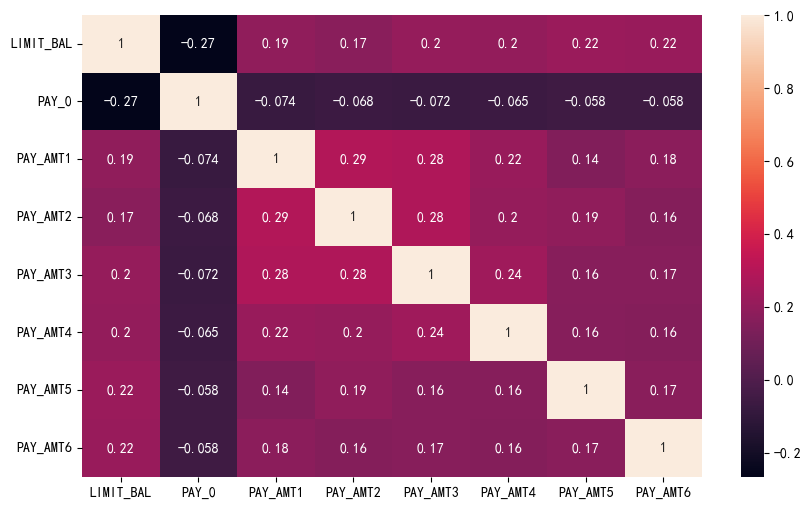

In [73]:
plot_corr(data_train[col_keep])

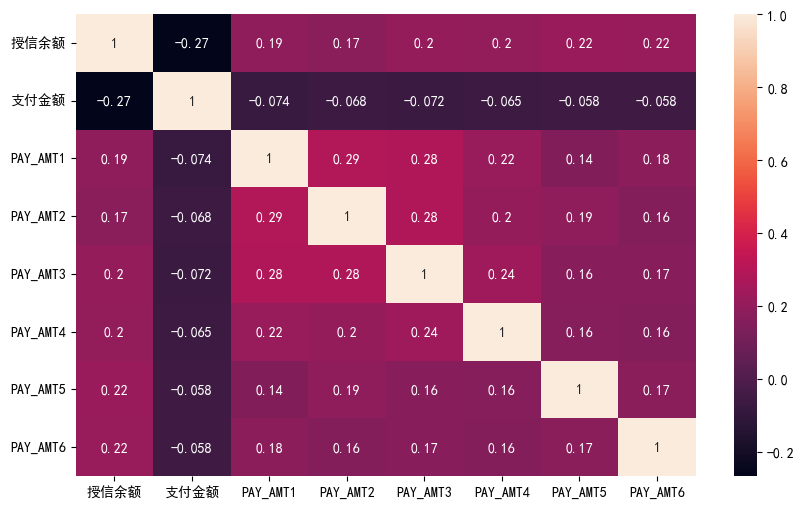

In [74]:
# 相关性表，添加中文
plot_corr(data_train[col_keep],col_dict = col_dict)

In [75]:
# 批量计算WoE，使用默认的决策树分箱方法
get_data_woe(data)  

2023-01-29 09:46:12,493 [INFO] 26572 get_data_woe WoE值计算中。。。


  0%|          | 0/24 [00:00<?, ?it/s]

2023-01-29 09:46:13,180 [INFO] 26572 get_data_woe WoE值计算完成！


,Name,WoE
6,PAY_0,1.58
10,PAY_5,0.74
11,PAY_6,0.69
9,PAY_4,0.57
7,PAY_2,0.45
8,PAY_3,0.40
5,AGE,0.26
0,ID,0.20
12,BILL_AMT1,0.04
2,SEX,0.04


In [76]:
# 批量计算IV，等频分箱，分为5箱
get_data_iv(data,qcut=5)  

2023-01-29 09:46:13,193 [INFO] 26572 get_data_iv IV值计算中。。。


  0%|          | 0/24 [00:00<?, ?it/s]

2023-01-29 09:46:13,682 [INFO] 26572 get_data_iv IV值计算完成！


,Name,IV
6,PAY_0,0.87
7,PAY_2,0.54
8,PAY_3,0.41
9,PAY_4,0.36
10,PAY_5,0.33
11,PAY_6,0.28
1,LIMIT_BAL,0.16
18,PAY_AMT1,0.15
19,PAY_AMT2,0.14
20,PAY_AMT3,0.12


## 获取模型变量的IV表单

In [77]:
#获取模型变量的IV表单
get_model_iv(data_train_discrete[col_keep+['y']],data_iv,col_bins=data_bins_adjust,col_dict=col_dict,col_types=col_types)  

  0%|          | 0/9 [00:00<?, ?it/s]

,No.,Name,Label,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,WoE,IV,Total IV,WoE.,Style
0,1,PAY_0,支付金额,continuous,1,missing,"[-inf, -1.0, 0.0, 1.0, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.86,0.00,0
1,1,PAY_0,支付金额,continuous,2,"(-inf, -1.0]","[-inf, -1.0, 0.0, 1.0, inf]",6288,977,5311,27.95%,19.79%,30.24%,15.54%,-0.42,0.04,0.86,-0.42,0
2,1,PAY_0,支付金额,continuous,3,"(-1.0, 0.0]","[-inf, -1.0, 0.0, 1.0, inf]",11109,1417,9692,49.37%,28.71%,55.18%,12.76%,-0.65,0.17,0.86,-0.65,0
3,1,PAY_0,支付金额,continuous,4,"(0.0, 1.0]","[-inf, -1.0, 0.0, 1.0, inf]",2767,921,1846,12.30%,18.66%,10.51%,33.29%,0.57,0.05,0.86,0.57,0
4,1,PAY_0,支付金额,continuous,5,"(1.0, inf]","[-inf, -1.0, 0.0, 1.0, inf]",2336,1621,715,10.38%,32.84%,4.07%,69.39%,2.09,0.60,0.86,2.09,0
5,2,PAY_AMT1,,continuous,1,missing,"[-inf, 21.0, 4550.0, 17580.0, inf]",0,0,0,0.00%,0.00%,0.00%,0.00%,0.00,0.00,0.18,0.00,1
6,2,PAY_AMT1,,continuous,2,"(-inf, 21.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",4055,1438,2617,18.02%,29.13%,14.90%,35.46%,0.67,0.10,0.18,0.67,1
7,2,PAY_AMT1,,continuous,3,"(21.0, 4550.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",11940,2585,9355,53.07%,52.37%,53.26%,21.65%,-0.02,0.00,0.18,-0.02,1
8,2,PAY_AMT1,,continuous,4,"(4550.0, 17580.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",5310,798,4512,23.60%,16.17%,25.69%,15.03%,-0.46,0.04,0.18,-0.46,1
9,2,PAY_AMT1,,continuous,5,"(17580.0, inf]","[-inf, 21.0, 4550.0, 17580.0, inf]",1195,115,1080,5.31%,2.33%,6.15%,9.62%,-0.97,0.04,0.18,-0.97,1


## 评分卡开发

In [78]:
# 按照默认参数，开发评分卡
get_scorecard(data_train[col_keep + ['y']] ,data_bins_adjust)

2023-01-29 09:46:13,896 [INFO] 26572 get_scorecard 开始配置评分卡...
2023-01-29 09:46:13,896 [INFO] 26572 get_col_type 连续和离散变量划分中。。。
2023-01-29 09:46:13,898 [INFO] 26572 get_col_type 连续和离散变量划分完成！
2023-01-29 09:46:13,898 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/24 [00:00<?, ?it/s]

2023-01-29 09:46:14,030 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:14,030 [INFO] 26572 get_data_woe_transform WOE转换中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:14,269 [INFO] 26572 get_data_woe_transform WOE转换完成！
2023-01-29 09:46:14,270 [INFO] 26572 get_data_iv IV值计算中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:14,439 [INFO] 26572 get_data_iv IV值计算完成！


Optimization terminated successfully.
         Current function value: 0.441133
         Iterations 6


  0%|          | 0/9 [00:00<?, ?it/s]

2023-01-29 09:46:14,662 [INFO] 26572 get_scorecard 评分卡配置完成...


,No.,Name,Label,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,...,%Good,%BadRate,WoE,IV,Total IV,WoE.,Style,Intercept,Coef,Score
0,1,PAY_0,,continuous,1,missing,"[-inf, -1.0, 0.0, 1.0, inf]",0,0,0,...,0.00%,0.00%,0.00,0.00,0.86,0.00,0,-1.27,0.91,-0.00
1,1,PAY_0,,continuous,2,"(-inf, -1.0]","[-inf, -1.0, 0.0, 1.0, inf]",6288,977,5311,...,30.24%,15.54%,-0.42,0.04,0.86,-0.42,0,-1.27,0.91,11.04
2,1,PAY_0,,continuous,3,"(-1.0, 0.0]","[-inf, -1.0, 0.0, 1.0, inf]",11109,1417,9692,...,55.18%,12.76%,-0.65,0.17,0.86,-0.65,0,-1.27,0.91,17.09
3,1,PAY_0,,continuous,4,"(0.0, 1.0]","[-inf, -1.0, 0.0, 1.0, inf]",2767,921,1846,...,10.51%,33.29%,0.57,0.05,0.86,0.57,0,-1.27,0.91,-14.98
4,1,PAY_0,,continuous,5,"(1.0, inf]","[-inf, -1.0, 0.0, 1.0, inf]",2336,1621,715,...,4.07%,69.39%,2.09,0.60,0.86,2.09,0,-1.27,0.91,-54.94
5,2,PAY_AMT1,,continuous,1,missing,"[-inf, 21.0, 4550.0, 17580.0, inf]",0,0,0,...,0.00%,0.00%,0.00,0.00,0.18,0.00,1,-1.27,0.14,-0.00
6,2,PAY_AMT1,,continuous,2,"(-inf, 21.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",4055,1438,2617,...,14.90%,35.46%,0.67,0.10,0.18,0.67,1,-1.27,0.14,-2.79
7,2,PAY_AMT1,,continuous,3,"(21.0, 4550.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",11940,2585,9355,...,53.26%,21.65%,-0.02,0.00,0.18,-0.02,1,-1.27,0.14,0.08
8,2,PAY_AMT1,,continuous,4,"(4550.0, 17580.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",5310,798,4512,...,25.69%,15.03%,-0.46,0.04,0.18,-0.46,1,-1.27,0.14,1.92
9,2,PAY_AMT1,,continuous,5,"(17580.0, inf]","[-inf, 21.0, 4550.0, 17580.0, inf]",1195,115,1080,...,6.15%,9.62%,-0.97,0.04,0.18,-0.97,1,-1.27,0.14,4.04


In [79]:
# 设置数据精度，并返回逻辑回归模型的详细内容
scorecard,lr,a,b = get_scorecard(data_train[col_keep + ['y']] ,data_bins_adjust,precision=4,return_lr=True)
scorecard

2023-01-29 09:46:14,705 [INFO] 26572 get_scorecard 开始配置评分卡...
2023-01-29 09:46:14,706 [INFO] 26572 get_col_type 连续和离散变量划分中。。。
2023-01-29 09:46:14,708 [INFO] 26572 get_col_type 连续和离散变量划分完成！
2023-01-29 09:46:14,709 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/24 [00:00<?, ?it/s]

2023-01-29 09:46:14,842 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:14,843 [INFO] 26572 get_data_woe_transform WOE转换中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:15,081 [INFO] 26572 get_data_woe_transform WOE转换完成！
2023-01-29 09:46:15,083 [INFO] 26572 get_data_iv IV值计算中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:15,225 [INFO] 26572 get_data_iv IV值计算完成！


Optimization terminated successfully.
         Current function value: 0.441133
         Iterations 6


  0%|          | 0/9 [00:00<?, ?it/s]

2023-01-29 09:46:15,428 [INFO] 26572 get_scorecard 评分卡配置完成...


,No.,Name,Label,Type,Bins No.,Bin,Bins,#Total,#Bad,#Good,...,%Good,%BadRate,WoE,IV,Total IV,WoE.,Style,Intercept,Coef,Score
0,1,PAY_0,,continuous,1,missing,"[-inf, -1.0, 0.0, 1.0, inf]",0,0,0,...,0.0000%,0.0000%,0.0000,0.0000,0.8647,0.0000,0,-1.2731,0.9110,-0.0000
1,1,PAY_0,,continuous,2,"(-inf, -1.0]","[-inf, -1.0, 0.0, 1.0, inf]",6288,977,5311,...,30.2380%,15.5375%,-0.4238,0.0443,0.8647,-0.4238,0,-1.2731,0.9110,11.1403
2,1,PAY_0,,continuous,3,"(-1.0, 0.0]","[-inf, -1.0, 0.0, 1.0, inf]",11109,1417,9692,...,55.1811%,12.7554%,-0.6535,0.1730,0.8647,-0.6535,0,-1.2731,0.9110,17.1784
3,1,PAY_0,,continuous,4,"(0.0, 1.0]","[-inf, -1.0, 0.0, 1.0, inf]",2767,921,1846,...,10.5101%,33.2851%,0.5740,0.0468,0.8647,0.5740,0,-1.2731,0.9110,-15.0886
4,1,PAY_0,,continuous,5,"(1.0, inf]","[-inf, -1.0, 0.0, 1.0, inf]",2336,1621,715,...,4.0708%,69.3921%,2.0878,0.6007,0.8647,2.0878,0,-1.2731,0.9110,-54.8814
5,2,PAY_AMT1,,continuous,1,missing,"[-inf, 21.0, 4550.0, 17580.0, inf]",0,0,0,...,0.0000%,0.0000%,0.0000,0.0000,0.1767,0.0000,1,-1.2731,0.1443,-0.0000
6,2,PAY_AMT1,,continuous,2,"(-inf, 21.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",4055,1438,2617,...,14.8998%,35.4624%,0.6705,0.0954,0.1767,0.6705,1,-1.2731,0.1443,-2.7924
7,2,PAY_AMT1,,continuous,3,"(21.0, 4550.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",11940,2585,9355,...,53.2624%,21.6499%,-0.0169,0.0002,0.1767,-0.0169,1,-1.2731,0.1443,0.0704
8,2,PAY_AMT1,,continuous,4,"(4550.0, 17580.0]","[-inf, 21.0, 4550.0, 17580.0, inf]",5310,798,4512,...,25.6889%,15.0282%,-0.4631,0.0441,0.1767,-0.4631,1,-1.2731,0.1443,1.9286
9,2,PAY_AMT1,,continuous,5,"(17580.0, inf]","[-inf, 21.0, 4550.0, 17580.0, inf]",1195,115,1080,...,6.1489%,9.6234%,-0.9705,0.0371,0.1767,-0.9705,1,-1.2731,0.1443,4.0417


In [80]:
# 查看逻辑回归模型的详细内容
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                22500
Model:                          Logit   Df Residuals:                    22491
Method:                           MLE   Df Model:                            8
Date:                Sun, 29 Jan 2023   Pseudo R-squ.:                  0.1615
Time:                        09:46:15   Log-Likelihood:                -9925.5
converged:                       True   LL-Null:                       -11838.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2731      0.018    -70.247      0.000      -1.309      -1.238
LIMIT_BAL      0.5425      0.045     11.958      0.000       0.454       0.631
PAY_0          0.9110      0.019     48.360      0.000       0.874       0.948
PAY_AMT1       0.1443      0.050      2.912      0.004       0.047       0.241
PAY_AMT2       0.2597      0.053      4.855      0.000       0.155       0.364
PAY_AMT3       0.2203      0.062      3.542      0.000       0.098       0.342
PAY_AMT4       0.1442      0.071      2.035      0.042       0.005       0.283
PAY_AMT5       0.1869      0.073      2.546      0.011       0.043       0.331
PAY_AMT6       0.0598      0.074      0.807      0.420      -0.085       0.205
==============================================================================
"""

In [81]:
# 查看评分卡模型的参数
print('a:',a,'','b:',b)

a: 563.3758572004575  b: 28.85390081777927


## 预测模型分数

In [82]:
# 预测模型分数
data_predict_score = get_predict_score(data_train,scorecard,precision=2)
data_predict_score

2023-01-29 09:46:15,562 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:15,568 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:15,654 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！


,PAY_0,PAY_0_Score,PAY_AMT1,PAY_AMT1_Score,LIMIT_BAL,LIMIT_BAL_Score,PAY_AMT2,PAY_AMT2_Score,PAY_AMT3,PAY_AMT3_Score,PAY_AMT4,PAY_AMT4_Score,PAY_AMT5,PAY_AMT5_Score,PAY_AMT6,PAY_AMT6_Score,y,Score,Proba
0,-1,11.14,1671.0,0.07,120000.0,-2.31,380.0,-0.03,131062.0,5.61,2000.0,0.65,3000.0,1.18,3000.0,0.42,0,616.84,0.14
1,-2,11.14,1468.0,0.07,200000.0,5.44,2321.0,-0.03,163597.0,5.61,6680.0,1.96,3963.0,1.18,2514.0,0.42,0,625.90,0.10
2,0,17.18,4038.0,0.07,80000.0,-2.31,3199.0,-0.03,914.0,0.10,850.0,-0.24,2055.0,1.18,8318.0,0.42,0,616.48,0.14
3,0,17.18,1596.0,0.07,20000.0,-10.74,2000.0,-0.03,3000.0,0.10,0.0,-1.93,1600.0,-0.32,0.0,-0.63,0,603.81,0.20
4,0,17.18,3000.0,0.07,90000.0,-2.31,2000.0,-0.03,2000.0,0.10,2000.0,0.65,2000.0,-0.32,1087.0,-0.14,0,615.31,0.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,2,-54.88,3000.0,0.07,50000.0,-2.31,2525.0,-0.03,3900.0,0.10,0.0,-1.93,2000.0,-0.32,4500.0,0.42,1,541.23,0.68
22496,-1,11.14,0.0,-2.79,210000.0,5.44,358.0,-0.03,12816.0,2.77,0.0,-1.93,102.0,-0.32,210.0,-0.14,0,614.25,0.15
22497,1,-15.09,0.0,-2.79,390000.0,11.15,1266.0,-0.03,0.0,-3.24,0.0,-1.93,0.0,-2.14,0.0,-0.63,0,585.41,0.32
22498,0,17.18,1700.0,0.07,30000.0,-10.74,1600.0,-0.03,1287.0,0.10,1296.0,-0.24,500.0,-0.32,1550.0,-0.14,0,605.99,0.19


## 计算AUC 和 KS

2023-01-29 09:46:15,832 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:15,836 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:15,933 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！


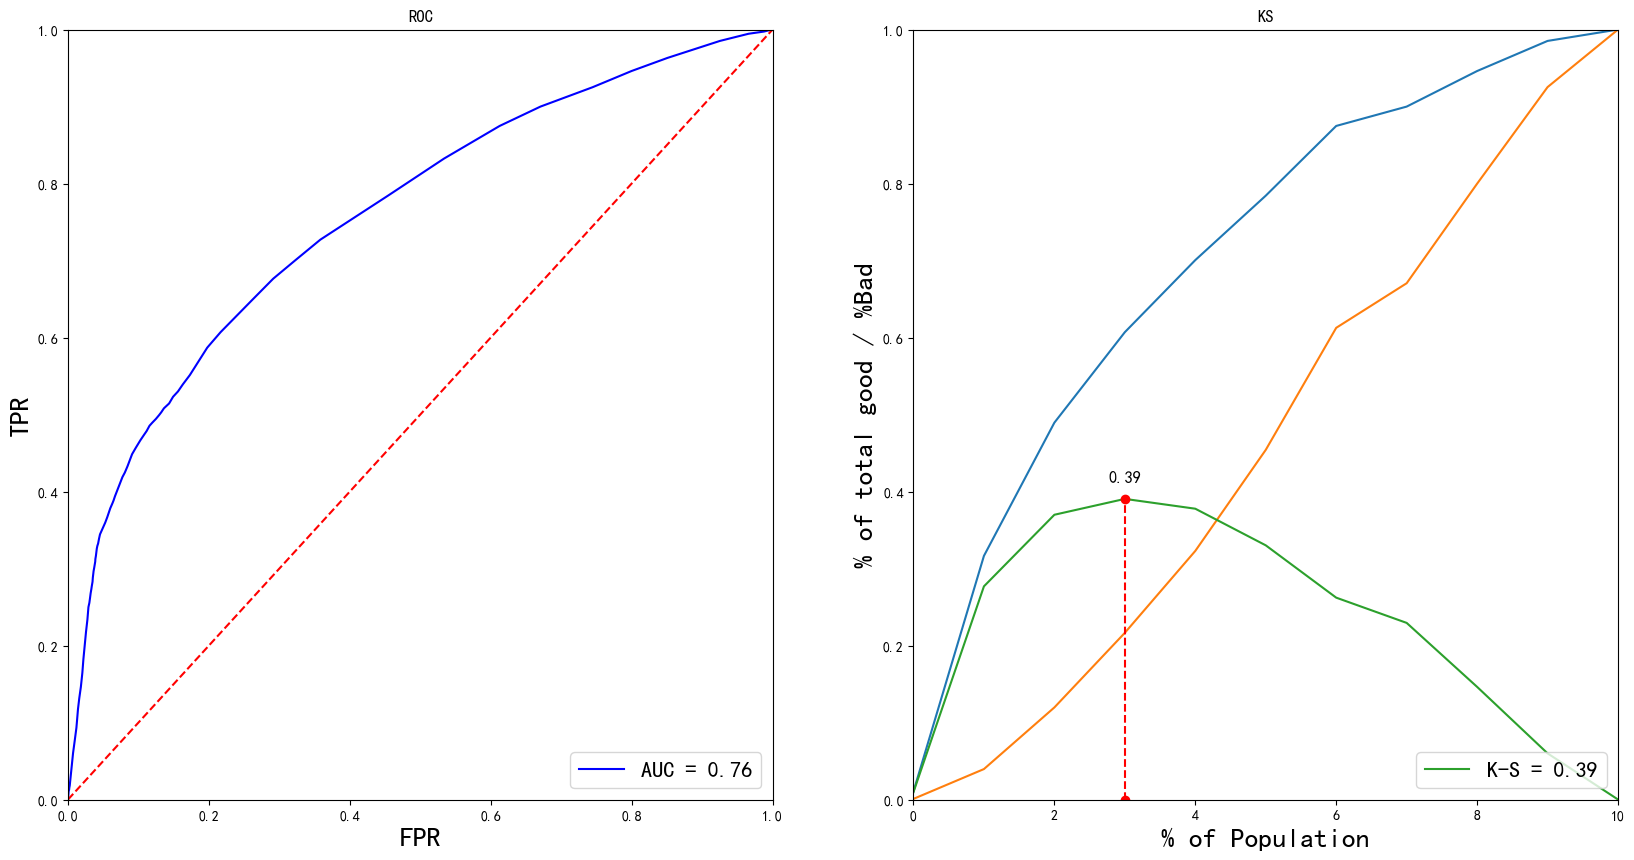

In [83]:
plot_roc_ks(data_train,scorecard)

2023-01-29 09:46:16,336 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:16,341 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:16,435 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！


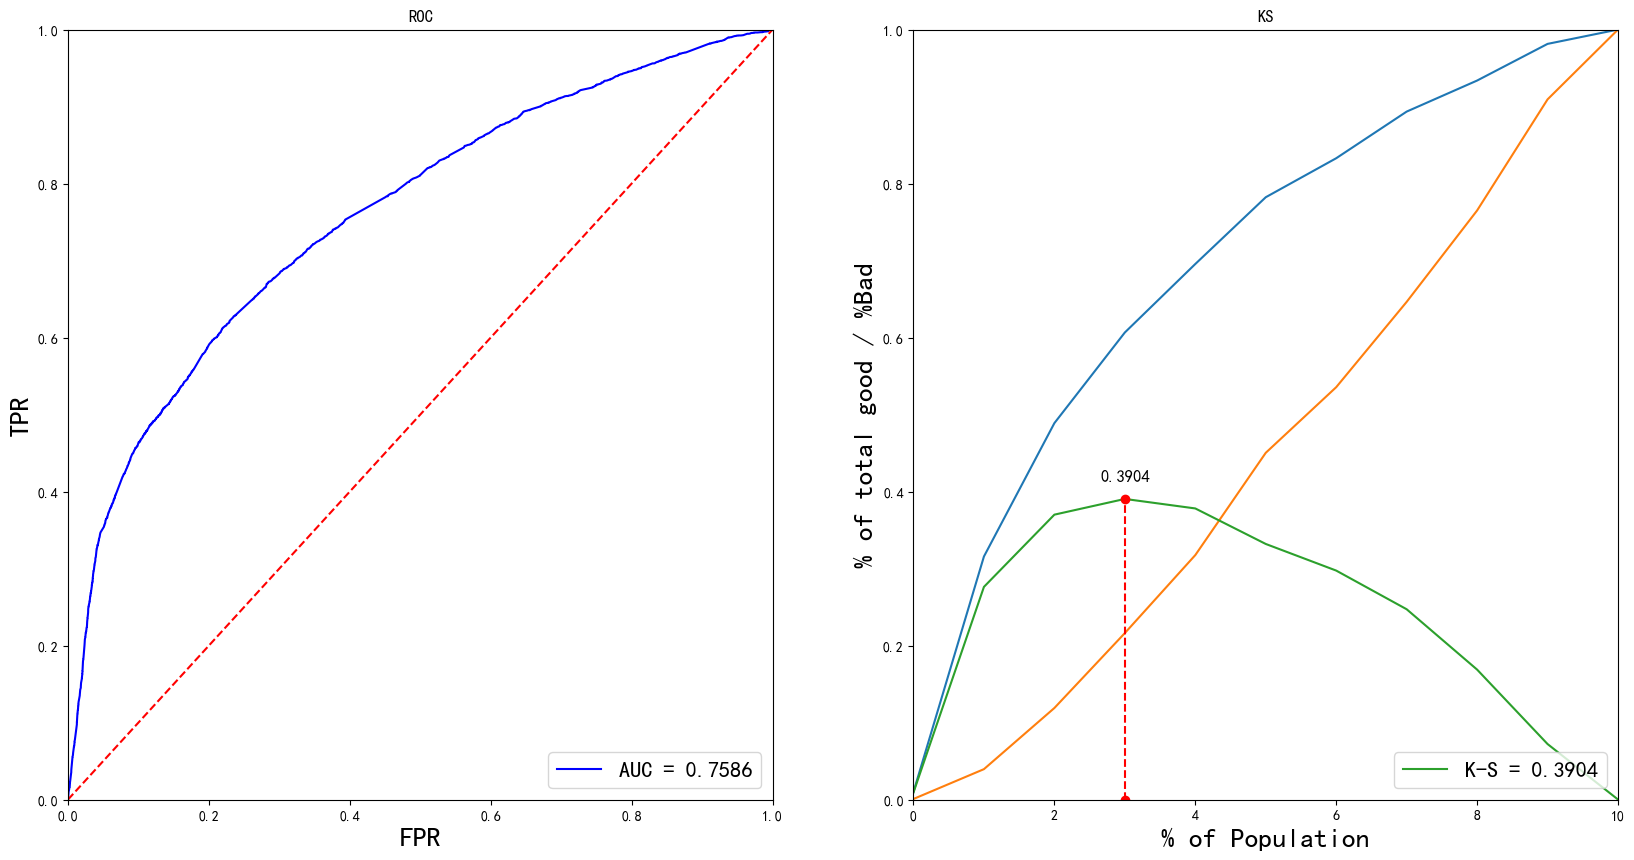

,No.,fpr,tpr,thresholds,ks
0,1,0.000740,0.009927,0.8205,0.009187
1,2,0.039456,0.315640,0.5171,0.276184
2,3,0.118880,0.488857,0.3063,0.369978
3,4,0.216181,0.606564,0.1956,0.390383
4,5,0.317468,0.695502,0.1676,0.378035
5,6,0.450296,0.782212,0.1456,0.331916
6,7,0.535527,0.832861,0.1348,0.297333
7,8,0.646322,0.893436,0.1176,0.247114
8,9,0.765031,0.933752,0.1012,0.168721
9,10,0.909303,0.981361,0.0792,0.072058


In [84]:
# 计算auc 和 ks，并返回 ks 结果数据
plot_roc_ks(data_train,scorecard,return_data=True,precision=4)

## AUC 计算

In [85]:
get_auc(data_train,scorecard)

2023-01-29 09:46:16,820 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:16,824 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:16,930 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！


0.76

## KS 计算

In [86]:
get_ks(data_train,scorecard)

2023-01-29 09:46:17,103 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:17,109 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:17,194 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！


0.39

In [87]:
#计算ks，并返回数据
get_ks(data_train,scorecard,return_data=True)

2023-01-29 09:46:17,383 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:17,386 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:17,476 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！


(0.39,
     No.       fpr       tpr  thresholds        ks
 0     1  0.000854  0.010535        0.82  0.009681
 1     2  0.039570  0.316451        0.52  0.276881
 2     3  0.119620  0.489465        0.31  0.369845
 3     4  0.216522  0.606969        0.20  0.390447
 4     5  0.322876  0.700567        0.17  0.377691
 5     6  0.454111  0.784238        0.15  0.330128
 6     7  0.612617  0.874797        0.13  0.262181
 7     8  0.670519  0.899919        0.12  0.229400
 8     9  0.799818  0.946110        0.10  0.146292
 9    10  0.925245  0.985211        0.08  0.059966
 10   11  1.000000  1.000000        0.04  0.000000)

## 查看评分卡分数分布 和 提升度

In [88]:
# 查看评分卡分数分布 和 提升度
get_score_dist(data_predict_score)

2023-01-29 09:46:17,662 [INFO] 26572 get_score_distribution 开始检查评分卡分布...


,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 561.0]",2259,1563,696,10.04%,31.67%,3.96%,69.19%,21.94%,69.19%,10.04%,6.89
1,2,"(561.0, 586.0]",2242,850,1392,9.96%,17.22%,7.93%,37.91%,21.94%,53.61%,20.00%,2.68
2,3,"(586.0, 604.0]",2498,632,1866,11.10%,12.80%,10.62%,25.30%,21.94%,43.51%,31.11%,1.40
3,4,"(604.0, 609.0]",2092,405,1687,9.30%,8.21%,9.60%,19.36%,21.94%,37.95%,40.40%,0.94
4,5,"(609.0, 614.0]",2970,444,2526,13.20%,9.00%,14.38%,14.95%,21.94%,32.29%,53.60%,0.60
5,6,"(614.0, 617.0]",2257,319,1938,10.03%,6.46%,11.03%,14.13%,21.94%,29.42%,63.64%,0.46
6,7,"(617.0, 621.0]",1614,209,1405,7.17%,4.23%,8.00%,12.95%,21.94%,27.76%,70.81%,0.39
7,8,"(621.0, 626.0]",2353,213,2140,10.46%,4.32%,12.18%,9.05%,21.94%,25.35%,81.27%,0.31
8,9,"(626.0, 634.0]",2728,220,2508,12.12%,4.46%,14.28%,8.06%,21.94%,23.10%,93.39%,0.25
9,10,"(634.0, inf]",1487,81,1406,6.61%,1.64%,8.01%,5.45%,21.94%,21.94%,100.00%,0.22


In [89]:
# 查看评分卡分数分布 和 提升度，分为5组，查看提升度
get_score_dist(data_predict_score,qcut=5)

2023-01-29 09:46:17,709 [INFO] 26572 get_score_distribution 开始检查评分卡分布...


,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 586.0]",4501,2413,2088,20.00%,48.89%,11.89%,53.61%,21.94%,53.61%,20.00%,2.68
1,2,"(586.0, 609.0]",4590,1037,3553,20.40%,21.01%,20.23%,22.59%,21.94%,37.95%,40.40%,0.94
2,3,"(609.0, 617.0]",5227,763,4464,23.23%,15.46%,25.42%,14.60%,21.94%,29.42%,63.64%,0.46
3,4,"(617.0, 626.0]",3967,422,3545,17.63%,8.55%,20.18%,10.64%,21.94%,25.35%,81.27%,0.31
4,5,"(626.0, inf]",4215,301,3914,18.73%,6.10%,22.28%,7.14%,21.94%,21.94%,100.00%,0.22


In [90]:
# 查看评分卡分数分布 和 提升度，分为5组，查看提升度
view_score_dist(data_predict_score,qcut=5)

2023-01-29 09:46:17,741 [INFO] 26572 get_score_distribution 开始检查评分卡分布...


,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 586.0]",4501,2413,2088,20.00%,48.89%,11.89%,53.61%,21.94%,53.61%,20.00%,2.680000,2.680000
1,2,"(586.0, 609.0]",4590,1037,3553,20.40%,21.01%,20.23%,22.59%,21.94%,37.95%,40.40%,0.940000,0.940000
2,3,"(609.0, 617.0]",5227,763,4464,23.23%,15.46%,25.42%,14.60%,21.94%,29.42%,63.64%,0.460000,0.460000
3,4,"(617.0, 626.0]",3967,422,3545,17.63%,8.55%,20.18%,10.64%,21.94%,25.35%,81.27%,0.310000,0.310000
4,5,"(626.0, inf]",4215,301,3914,18.73%,6.10%,22.28%,7.14%,21.94%,21.94%,100.00%,0.220000,0.220000


In [91]:
# 查看评分卡分数分布 和 提升度，分为5组，查看提升度
view_score_dist(data_predict_score,qcut=5,color='green')

2023-01-29 09:46:17,771 [INFO] 26572 get_score_distribution 开始检查评分卡分布...


,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 586.0]",4501,2413,2088,20.00%,48.89%,11.89%,53.61%,21.94%,53.61%,20.00%,2.680000,2.680000
1,2,"(586.0, 609.0]",4590,1037,3553,20.40%,21.01%,20.23%,22.59%,21.94%,37.95%,40.40%,0.940000,0.940000
2,3,"(609.0, 617.0]",5227,763,4464,23.23%,15.46%,25.42%,14.60%,21.94%,29.42%,63.64%,0.460000,0.460000
3,4,"(617.0, 626.0]",3967,422,3545,17.63%,8.55%,20.18%,10.64%,21.94%,25.35%,81.27%,0.310000,0.310000
4,5,"(626.0, inf]",4215,301,3914,18.73%,6.10%,22.28%,7.14%,21.94%,21.94%,100.00%,0.220000,0.220000


In [92]:
# 查看评分卡分数分布 和 提升度，分为5组，查看提升度
view_score_dist(data_predict_score,qcut=5,color='#02B057')

2023-01-29 09:46:17,802 [INFO] 26572 get_score_distribution 开始检查评分卡分布...


,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift,Lift.
0,1,"(-inf, 586.0]",4501,2413,2088,20.00%,48.89%,11.89%,53.61%,21.94%,53.61%,20.00%,2.680000,2.680000
1,2,"(586.0, 609.0]",4590,1037,3553,20.40%,21.01%,20.23%,22.59%,21.94%,37.95%,40.40%,0.940000,0.940000
2,3,"(609.0, 617.0]",5227,763,4464,23.23%,15.46%,25.42%,14.60%,21.94%,29.42%,63.64%,0.460000,0.460000
3,4,"(617.0, 626.0]",3967,422,3545,17.63%,8.55%,20.18%,10.64%,21.94%,25.35%,81.27%,0.310000,0.310000
4,5,"(626.0, inf]",4215,301,3914,18.73%,6.10%,22.28%,7.14%,21.94%,21.94%,100.00%,0.220000,0.220000


In [93]:
# 查看评分卡分数分布 和 提升度,  标题显示为中文
get_score_dist(data_predict_score,language='cn')

2023-01-29 09:46:17,834 [INFO] 26572 get_score_distribution 开始检查评分卡分布...


,序号,分数区间,#合计,#坏,#好,%合计,%坏,%好,%坏件率,%随机坏件率,%累计坏,%累计合计,提升度
0,1,"(-inf, 561.0]",2259,1563,696,10.04%,31.67%,3.96%,69.19%,21.94%,69.19%,10.04%,6.89
1,2,"(561.0, 586.0]",2242,850,1392,9.96%,17.22%,7.93%,37.91%,21.94%,53.61%,20.00%,2.68
2,3,"(586.0, 604.0]",2498,632,1866,11.10%,12.80%,10.62%,25.30%,21.94%,43.51%,31.11%,1.40
3,4,"(604.0, 609.0]",2092,405,1687,9.30%,8.21%,9.60%,19.36%,21.94%,37.95%,40.40%,0.94
4,5,"(609.0, 614.0]",2970,444,2526,13.20%,9.00%,14.38%,14.95%,21.94%,32.29%,53.60%,0.60
5,6,"(614.0, 617.0]",2257,319,1938,10.03%,6.46%,11.03%,14.13%,21.94%,29.42%,63.64%,0.46
6,7,"(617.0, 621.0]",1614,209,1405,7.17%,4.23%,8.00%,12.95%,21.94%,27.76%,70.81%,0.39
7,8,"(621.0, 626.0]",2353,213,2140,10.46%,4.32%,12.18%,9.05%,21.94%,25.35%,81.27%,0.31
8,9,"(626.0, 634.0]",2728,220,2508,12.12%,4.46%,14.28%,8.06%,21.94%,23.10%,93.39%,0.25
9,10,"(634.0, inf]",1487,81,1406,6.61%,1.64%,8.01%,5.45%,21.94%,21.94%,100.00%,0.22


2023-01-29 09:46:17,880 [INFO] 26572 get_score_distribution 开始检查评分卡分布...


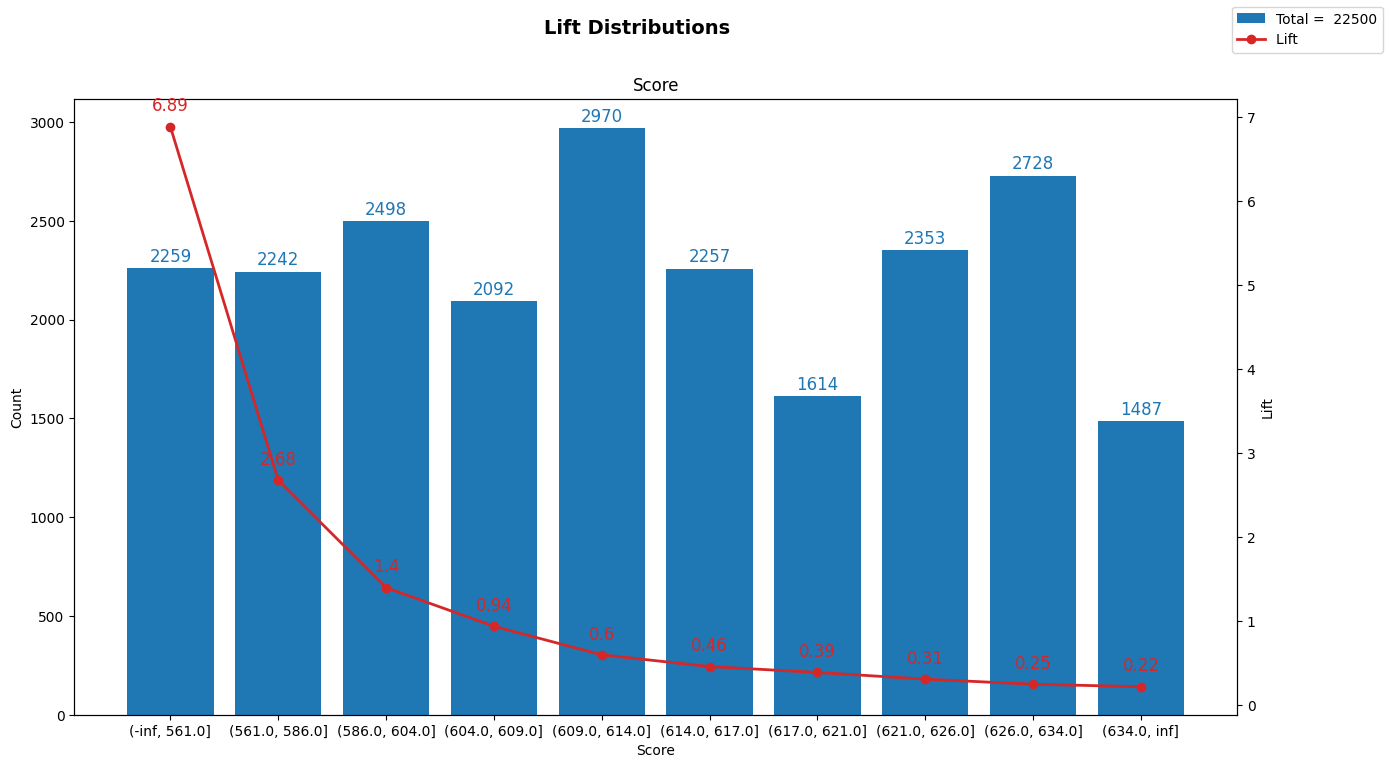

In [94]:
# 绘制提升度图    
plot_lift(data_predict_score)

2023-01-29 09:46:18,146 [INFO] 26572 get_score_distribution 开始检查评分卡分布...


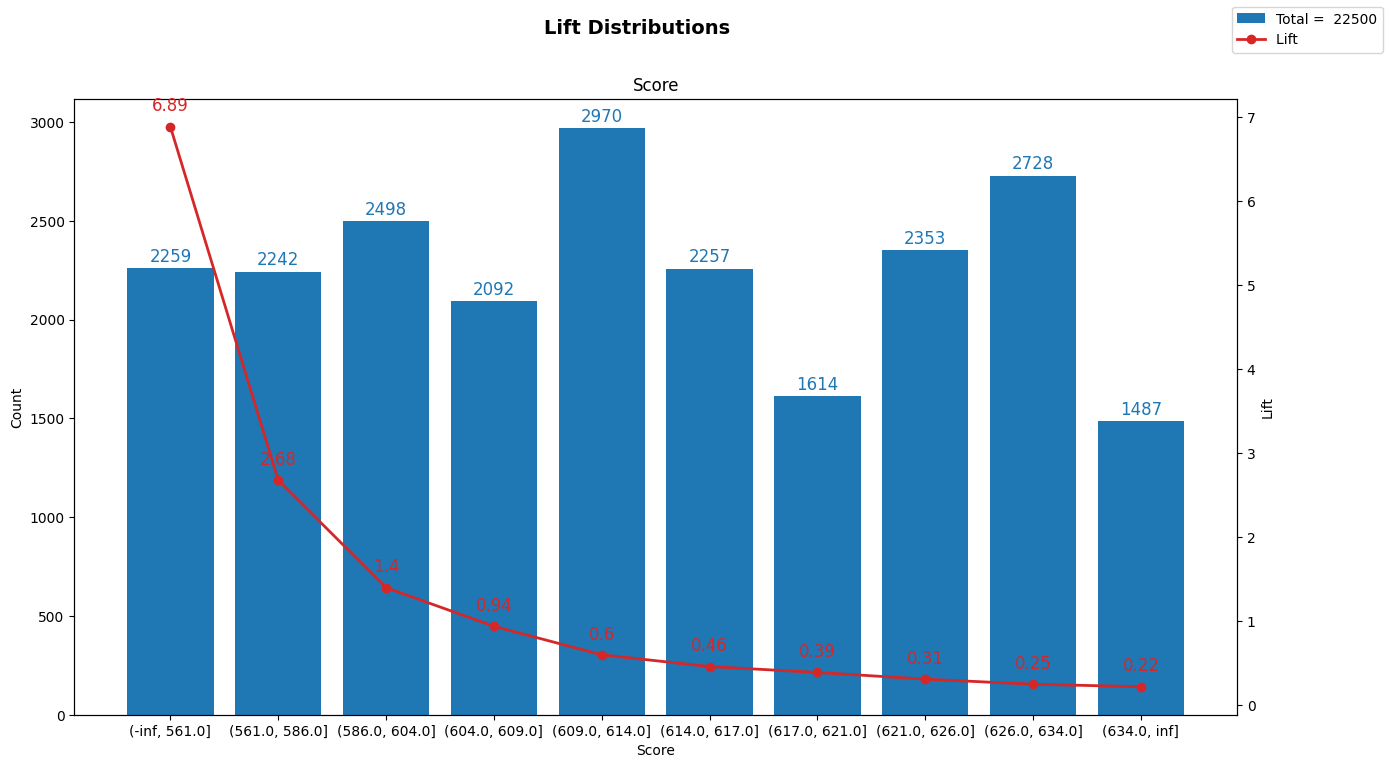

,No.,Score Range,#Total,#Bad,#Good,%Total,%Bad,%Good,%BadRate,%BadRate Random,%CumBad,%CumTotal,Lift
0,1,"(-inf, 561.0]",2259,1563,696,10.04%,31.67%,3.96%,69.19%,21.94%,69.19%,10.04%,6.89
1,2,"(561.0, 586.0]",2242,850,1392,9.96%,17.22%,7.93%,37.91%,21.94%,53.61%,20.00%,2.68
2,3,"(586.0, 604.0]",2498,632,1866,11.10%,12.80%,10.62%,25.30%,21.94%,43.51%,31.11%,1.40
3,4,"(604.0, 609.0]",2092,405,1687,9.30%,8.21%,9.60%,19.36%,21.94%,37.95%,40.40%,0.94
4,5,"(609.0, 614.0]",2970,444,2526,13.20%,9.00%,14.38%,14.95%,21.94%,32.29%,53.60%,0.60
5,6,"(614.0, 617.0]",2257,319,1938,10.03%,6.46%,11.03%,14.13%,21.94%,29.42%,63.64%,0.46
6,7,"(617.0, 621.0]",1614,209,1405,7.17%,4.23%,8.00%,12.95%,21.94%,27.76%,70.81%,0.39
7,8,"(621.0, 626.0]",2353,213,2140,10.46%,4.32%,12.18%,9.05%,21.94%,25.35%,81.27%,0.31
8,9,"(626.0, 634.0]",2728,220,2508,12.12%,4.46%,14.28%,8.06%,21.94%,23.10%,93.39%,0.25
9,10,"(634.0, inf]",1487,81,1406,6.61%,1.64%,8.01%,5.45%,21.94%,21.94%,100.00%,0.22


In [95]:
# 绘制提升度图，并输出提升度表格
plot_lift(data_predict_score,return_data=True)

2023-01-29 09:46:18,424 [INFO] 26572 get_score_distribution 开始检查评分卡分布...


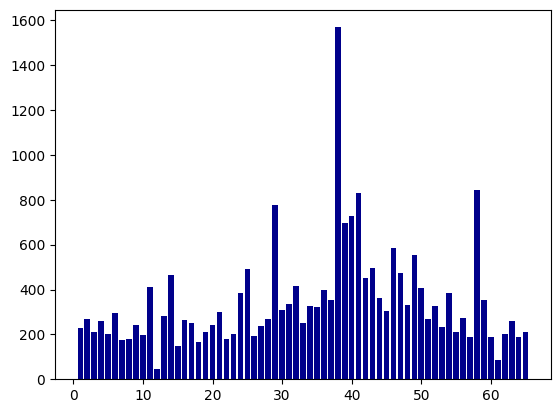

In [96]:
# 评分卡分数分布
import matplotlib.pyplot as plt
plt.style.use('default')
data_train_score = get_score_dist(data_predict_score,qcut=100)
x=data_train_score['No.']
y=data_train_score['#Total']

fig=plt.figure()
ax1=fig.add_subplot(1,1,1)
ax1.bar(x,y,align='center',color='darkblue')
plt.show()

## 模型稳定性 PSI计算

In [97]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
get_col_psi(data_train_score,data_test_score)

2023-01-29 09:46:18,579 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:18,584 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:18,676 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:18,835 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:18,839 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:18,888 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:18,951 [INFO] 26572 get_col_psi 计算特征的PSI...


,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,Score,"(-inf, 561.39]",3019,2251,768,10.06%,10.00%,10.24%,0.00,0.07
1,2,Score,"(561.39, 586.958]",2990,2249,741,9.97%,10.00%,9.88%,0.00,0.07
2,3,Score,"(586.958, 604.164]",2921,2250,671,9.74%,10.00%,8.95%,0.00,0.07
3,4,Score,"(604.164, 609.596]",2939,2250,689,9.80%,10.00%,9.19%,0.00,0.07
4,5,Score,"(609.596, 614.42]",3247,2765,482,10.82%,12.29%,6.43%,0.04,0.07
5,6,Score,"(614.42, 617.02]",2575,1752,823,8.58%,7.79%,10.97%,0.01,0.07
6,7,Score,"(617.02, 621.503]",3142,2233,909,10.47%,9.92%,12.12%,0.00,0.07
7,8,Score,"(621.503, 626.39]",3051,2293,758,10.17%,10.19%,10.11%,0.00,0.07
8,9,Score,"(626.39, 634.14]",3571,2767,804,11.90%,12.30%,10.72%,0.00,0.07
9,10,Score,"(634.14, inf]",2545,1690,855,8.48%,7.51%,11.40%,0.02,0.07


In [98]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
view_col_psi(data_train_score,data_test_score)

2023-01-29 09:46:18,986 [INFO] 26572 get_col_psi 计算特征的PSI...


,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 561.39]",3019,2251,768,10.06%,10.00%,10.24%,0.000000,0.070000,0.000000
1,2,Score,"(561.39, 586.958]",2990,2249,741,9.97%,10.00%,9.88%,0.000000,0.070000,0.000000
2,3,Score,"(586.958, 604.164]",2921,2250,671,9.74%,10.00%,8.95%,0.000000,0.070000,0.000000
3,4,Score,"(604.164, 609.596]",2939,2250,689,9.80%,10.00%,9.19%,0.000000,0.070000,0.000000
4,5,Score,"(609.596, 614.42]",3247,2765,482,10.82%,12.29%,6.43%,0.040000,0.070000,0.040000
5,6,Score,"(614.42, 617.02]",2575,1752,823,8.58%,7.79%,10.97%,0.010000,0.070000,0.010000
6,7,Score,"(617.02, 621.503]",3142,2233,909,10.47%,9.92%,12.12%,0.000000,0.070000,0.000000
7,8,Score,"(621.503, 626.39]",3051,2293,758,10.17%,10.19%,10.11%,0.000000,0.070000,0.000000
8,9,Score,"(626.39, 634.14]",3571,2767,804,11.90%,12.30%,10.72%,0.000000,0.070000,0.000000
9,10,Score,"(634.14, inf]",2545,1690,855,8.48%,7.51%,11.40%,0.020000,0.070000,0.020000


In [99]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
view_col_psi(data_train_score,data_test_score,color='green')

2023-01-29 09:46:19,033 [INFO] 26572 get_col_psi 计算特征的PSI...


,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 561.39]",3019,2251,768,10.06%,10.00%,10.24%,0.000000,0.070000,0.000000
1,2,Score,"(561.39, 586.958]",2990,2249,741,9.97%,10.00%,9.88%,0.000000,0.070000,0.000000
2,3,Score,"(586.958, 604.164]",2921,2250,671,9.74%,10.00%,8.95%,0.000000,0.070000,0.000000
3,4,Score,"(604.164, 609.596]",2939,2250,689,9.80%,10.00%,9.19%,0.000000,0.070000,0.000000
4,5,Score,"(609.596, 614.42]",3247,2765,482,10.82%,12.29%,6.43%,0.040000,0.070000,0.040000
5,6,Score,"(614.42, 617.02]",2575,1752,823,8.58%,7.79%,10.97%,0.010000,0.070000,0.010000
6,7,Score,"(617.02, 621.503]",3142,2233,909,10.47%,9.92%,12.12%,0.000000,0.070000,0.000000
7,8,Score,"(621.503, 626.39]",3051,2293,758,10.17%,10.19%,10.11%,0.000000,0.070000,0.000000
8,9,Score,"(626.39, 634.14]",3571,2767,804,11.90%,12.30%,10.72%,0.000000,0.070000,0.000000
9,10,Score,"(634.14, inf]",2545,1690,855,8.48%,7.51%,11.40%,0.020000,0.070000,0.020000


In [100]:
# 按照等频分箱，分为10组，计算模型得分 Score 的PSI
view_col_psi(data_train_score,data_test_score,color='#02B057')

2023-01-29 09:46:19,065 [INFO] 26572 get_col_psi 计算特征的PSI...


,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI,PSI.
0,1,Score,"(-inf, 561.39]",3019,2251,768,10.06%,10.00%,10.24%,0.000000,0.070000,0.000000
1,2,Score,"(561.39, 586.958]",2990,2249,741,9.97%,10.00%,9.88%,0.000000,0.070000,0.000000
2,3,Score,"(586.958, 604.164]",2921,2250,671,9.74%,10.00%,8.95%,0.000000,0.070000,0.000000
3,4,Score,"(604.164, 609.596]",2939,2250,689,9.80%,10.00%,9.19%,0.000000,0.070000,0.000000
4,5,Score,"(609.596, 614.42]",3247,2765,482,10.82%,12.29%,6.43%,0.040000,0.070000,0.040000
5,6,Score,"(614.42, 617.02]",2575,1752,823,8.58%,7.79%,10.97%,0.010000,0.070000,0.010000
6,7,Score,"(617.02, 621.503]",3142,2233,909,10.47%,9.92%,12.12%,0.000000,0.070000,0.000000
7,8,Score,"(621.503, 626.39]",3051,2293,758,10.17%,10.19%,10.11%,0.000000,0.070000,0.000000
8,9,Score,"(626.39, 634.14]",3571,2767,804,11.90%,12.30%,10.72%,0.000000,0.070000,0.000000
9,10,Score,"(634.14, inf]",2545,1690,855,8.48%,7.51%,11.40%,0.020000,0.070000,0.020000


In [101]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照等频分箱，分为5组，计算PSI
get_col_psi(data_train_score,data_test_score,col='LIMIT_BAL',qcut=5,precision=4)

2023-01-29 09:46:19,094 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:19,100 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:19,190 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:19,449 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:19,453 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:19,505 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:19,568 [INFO] 26572 get_col_psi 计算特征的PSI...


,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,LIMIT_BAL,"(-inf, 50000.0]",7676,5855,1821,25.5867%,26.0222%,24.2800%,0.0012,0.0018
1,2,LIMIT_BAL,"(50000.0, 100000.0]",4822,3593,1229,16.0733%,15.9689%,16.3867%,0.0001,0.0018
2,3,LIMIT_BAL,"(100000.0, 180000.0]",6123,4548,1575,20.4100%,20.2133%,21.0000%,0.0003,0.0018
3,4,LIMIT_BAL,"(180000.0, 270000.0]",5421,4035,1386,18.0700%,17.9333%,18.4800%,0.0002,0.0018
4,5,LIMIT_BAL,"(270000.0, inf]",5958,4469,1489,19.8600%,19.8622%,19.8533%,0.0000,0.0018


In [102]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照指定的切分点，计算PSI
get_col_psi(data_train_score,data_test_score,col='LIMIT_BAL',bins=[-inf,30000,50000,100000,inf],precision=4)

2023-01-29 09:46:19,596 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:19,600 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:19,692 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:19,844 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:19,848 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:19,903 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:19,965 [INFO] 26572 get_col_psi 计算特征的PSI...


,No.,Name,Bins Range,#Total,#Actual,#Expected,%Total,%Actual,%Expected,PSI,Total PSI
0,1,LIMIT_BAL,"(-inf, 30000.0]",4111,3109,1002,13.7033%,13.8178%,13.3600%,0.0002,0.0002
1,2,LIMIT_BAL,"(30000.0, 50000.0]",3649,2746,903,12.1633%,12.2044%,12.0400%,0.0000,0.0002
2,3,LIMIT_BAL,"(50000.0, 100000.0]",4794,3593,1201,15.9800%,15.9689%,16.0133%,0.0000,0.0002
3,4,LIMIT_BAL,"(100000.0, inf]",17446,13052,4394,58.1533%,58.0089%,58.5867%,0.0001,0.0002


In [103]:
data_train_score = get_predict_score(data_train,scorecard)
data_test_score = get_predict_score(data_test,scorecard)

# 按照指定的切分点，计算PSI，标题显示为中文
get_col_psi(data_train_score,data_test_score,col='LIMIT_BAL',bins=[-inf,30000,50000,100000,inf],precision=4,language='cn')

2023-01-29 09:46:19,999 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:20,005 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:20,096 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:20,249 [INFO] 26572 get_predict_score 预测用户分数中...
2023-01-29 09:46:20,253 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量进行中。。。


  0%|          | 0/8 [00:00<?, ?it/s]

2023-01-29 09:46:20,308 [INFO] 26572 get_data_discrete 根据分箱离散化连续变量完成！
2023-01-29 09:46:20,367 [INFO] 26572 get_col_psi 计算特征的PSI...


,序号,名称,分组,#合计,#实际,#期望,%合计,%实际,%期望,PSI,PSI 合计
0,1,LIMIT_BAL,"(-inf, 30000.0]",4111,3109,1002,13.7033%,13.8178%,13.3600%,0.0002,0.0002
1,2,LIMIT_BAL,"(30000.0, 50000.0]",3649,2746,903,12.1633%,12.2044%,12.0400%,0.0000,0.0002
2,3,LIMIT_BAL,"(50000.0, 100000.0]",4794,3593,1201,15.9800%,15.9689%,16.0133%,0.0000,0.0002
3,4,LIMIT_BAL,"(100000.0, inf]",17446,13052,4394,58.1533%,58.0089%,58.5867%,0.0001,0.0002
